# Time Series Data Validation Demo

## Setup 

### Import Libraries

In [45]:
# Load API key and secret from environment variables
from dotenv import load_dotenv
load_dotenv()

# System libraries
import glob
import os
import pickle

# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm

### Use Case Configuration

In [46]:
dataset = 'fred'

if dataset == 'lending_club':
    target_column = ['loan_rate_A']
    feature_columns = ['loan_rate_B', 'loan_rate_C', 'loan_rate_D']
    data_file = '../datasets/time_series/lending_club_loan_rates.csv'
    raw_df = pd.read_csv(data_file, parse_dates=['DATE'], index_col='DATE')
if dataset == 'fred':
    target_column = ['MORTGAGE30US']
    feature_columns = ['FEDFUNDS', 'GS10', 'UNRATE']
    data_file = file = '../datasets/time_series/fred_loan_rates.csv'
    raw_df = pd.read_csv(data_file, parse_dates=['DATE'], index_col='DATE')
    selected_cols = target_column + feature_columns
    raw_df = raw_df[selected_cols]

### Connect to ValidMind MRM Platform

In [47]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  api_key = "e22b89a6b9c2a27da47cb0a09febc001",
  api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
  project = "clgo0g0rt0000fjy6ozl9pb69"
)

Connected to ValidMind


## Data Collection

In [48]:
display(raw_df)

,MORTGAGE30US,FEDFUNDS,GS10,UNRATE
DATE,,,,
1947-01-01,NaN,NaN,NaN,NaN
1947-02-01,NaN,NaN,NaN,NaN
1947-03-01,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,NaN,NaN
1947-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-04-01,NaN,NaN,3.46,NaN
2023-04-06,6.28,NaN,NaN,NaN
2023-04-13,6.27,NaN,NaN,NaN


## Data Preparation

### List of Available Test Plans

In [49]:
vm.test_plans.list_plans()

ID,Name,Description
sklearn_classifier_metrics,SKLearnClassifierMetrics,Test plan for sklearn classifier metrics
sklearn_classifier_validation,SKLearnClassifierPerformance,Test plan for sklearn classifier models
sklearn_classifier_model_diagnosis,SKLearnClassifierDiagnosis,Test plan for sklearn classifier model diagnosis tests
sklearn_classifier,SKLearnClassifier,Test plan for sklearn classifier models that includes both metrics and validation tests
tabular_dataset,TabularDataset,Test plan for generic tabular datasets
tabular_dataset_description,TabularDatasetDescription,Test plan to extract metadata and descriptive statistics from a tabular dataset
tabular_data_quality,TabularDataQuality,Test plan for data quality on tabular datasets
normality_test_plan,NormalityTestPlan,Test plan to perform normality tests.
autocorrelation_test_plan,AutocorrelationTestPlan,Test plan to perform autocorrelation tests.
seasonality_test_plan,SesonalityTestPlan,Test plan to perform seasonality tests.


### Data Quality

#### Run Data Quality Test Plan

In [50]:
vm_dataset = vm.init_dataset(
    dataset=raw_df,
    target_column=target_column
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


In [51]:
vm.test_plans.describe_plan("time_series_data_quality")

Attribute,Value
ID,time_series_data_quality
Name,TimeSeriesDataQuality
Description,Test plan for data quality on time series datasets
Required Context,['dataset']
Tests,"TimeSeriesMissingValues (ThresholdTest), TimeSeriesFrequency (ThresholdTest)"
Test Plans,[]



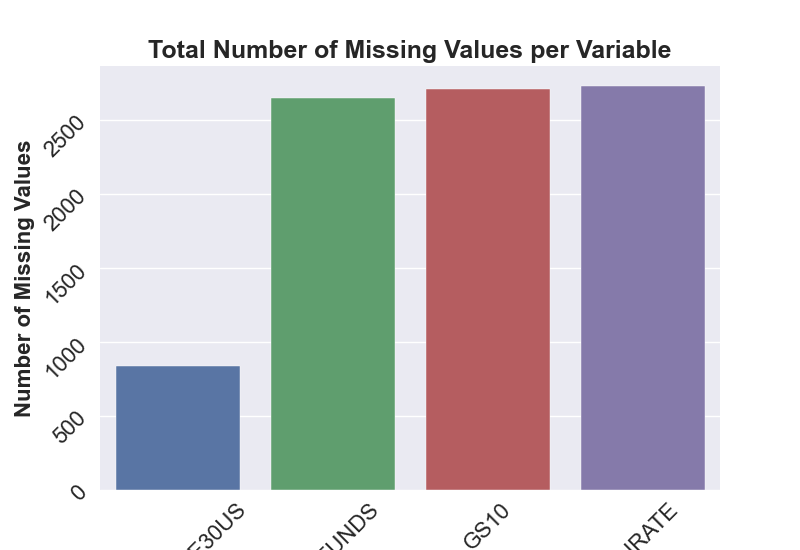
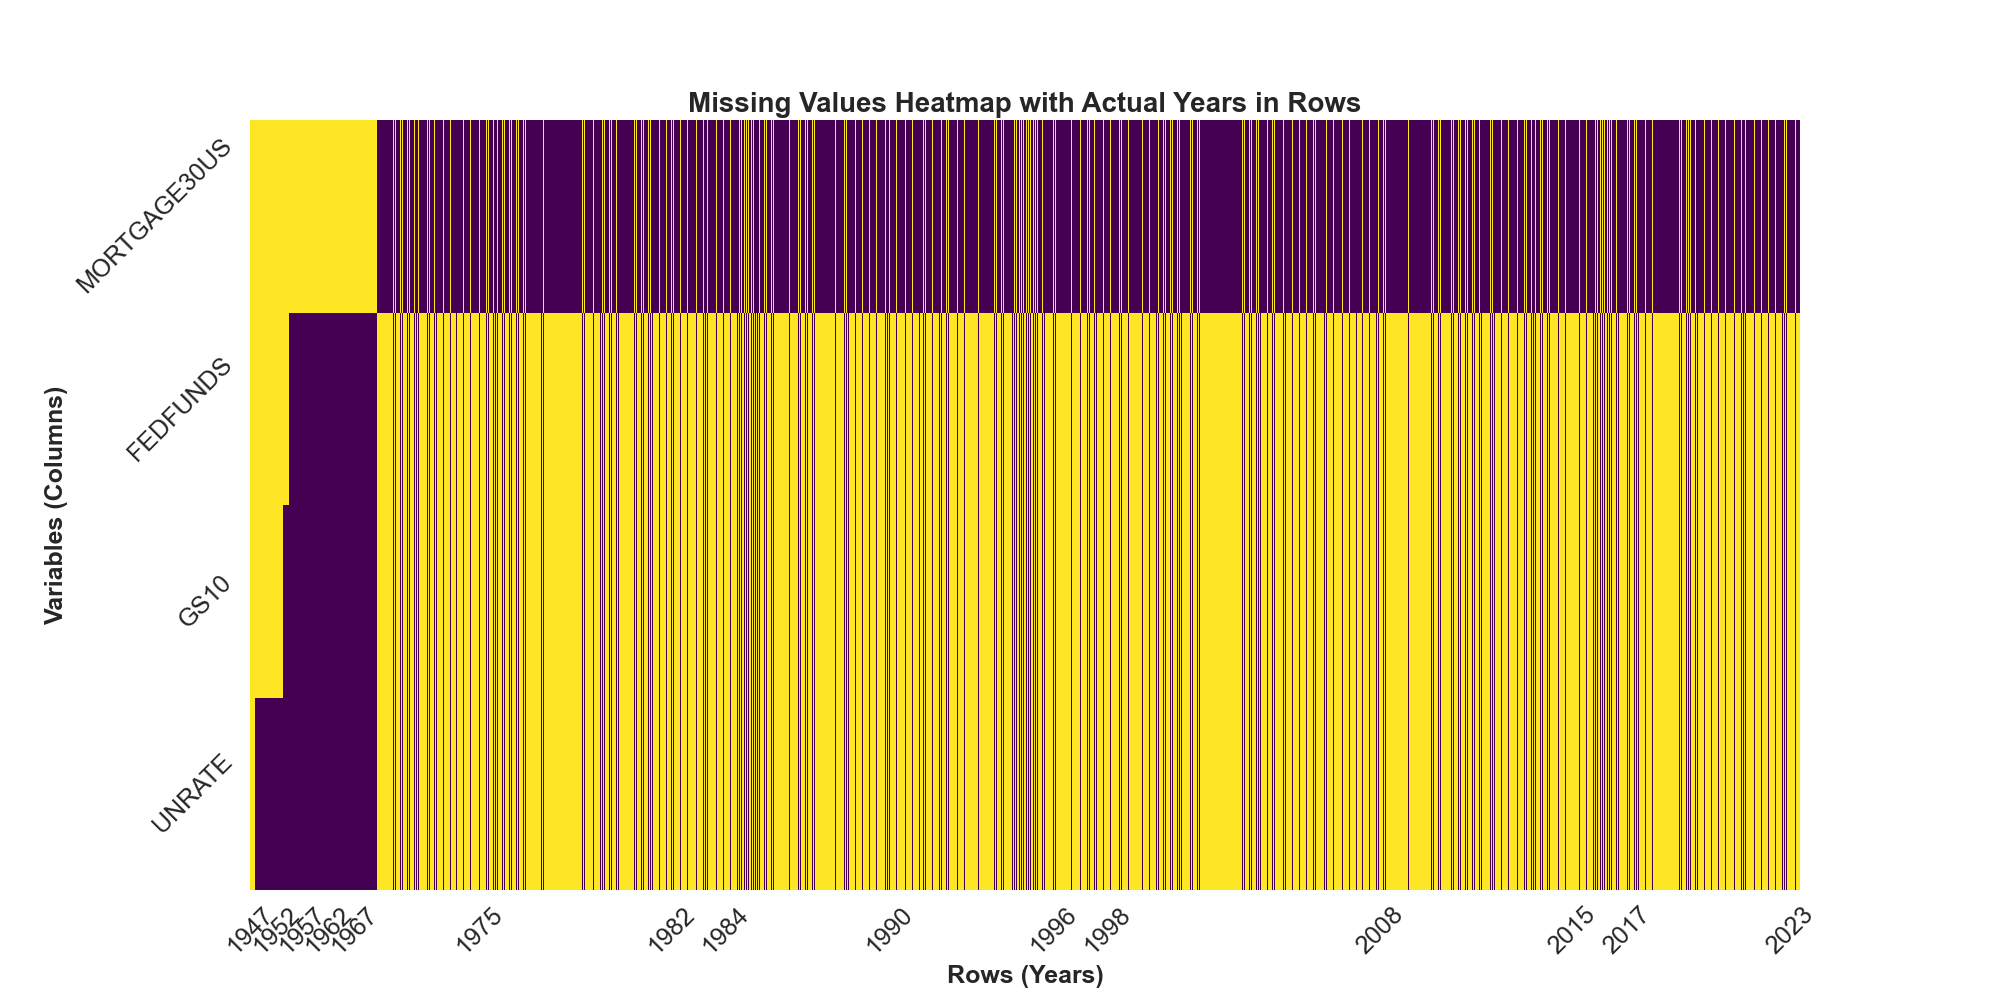
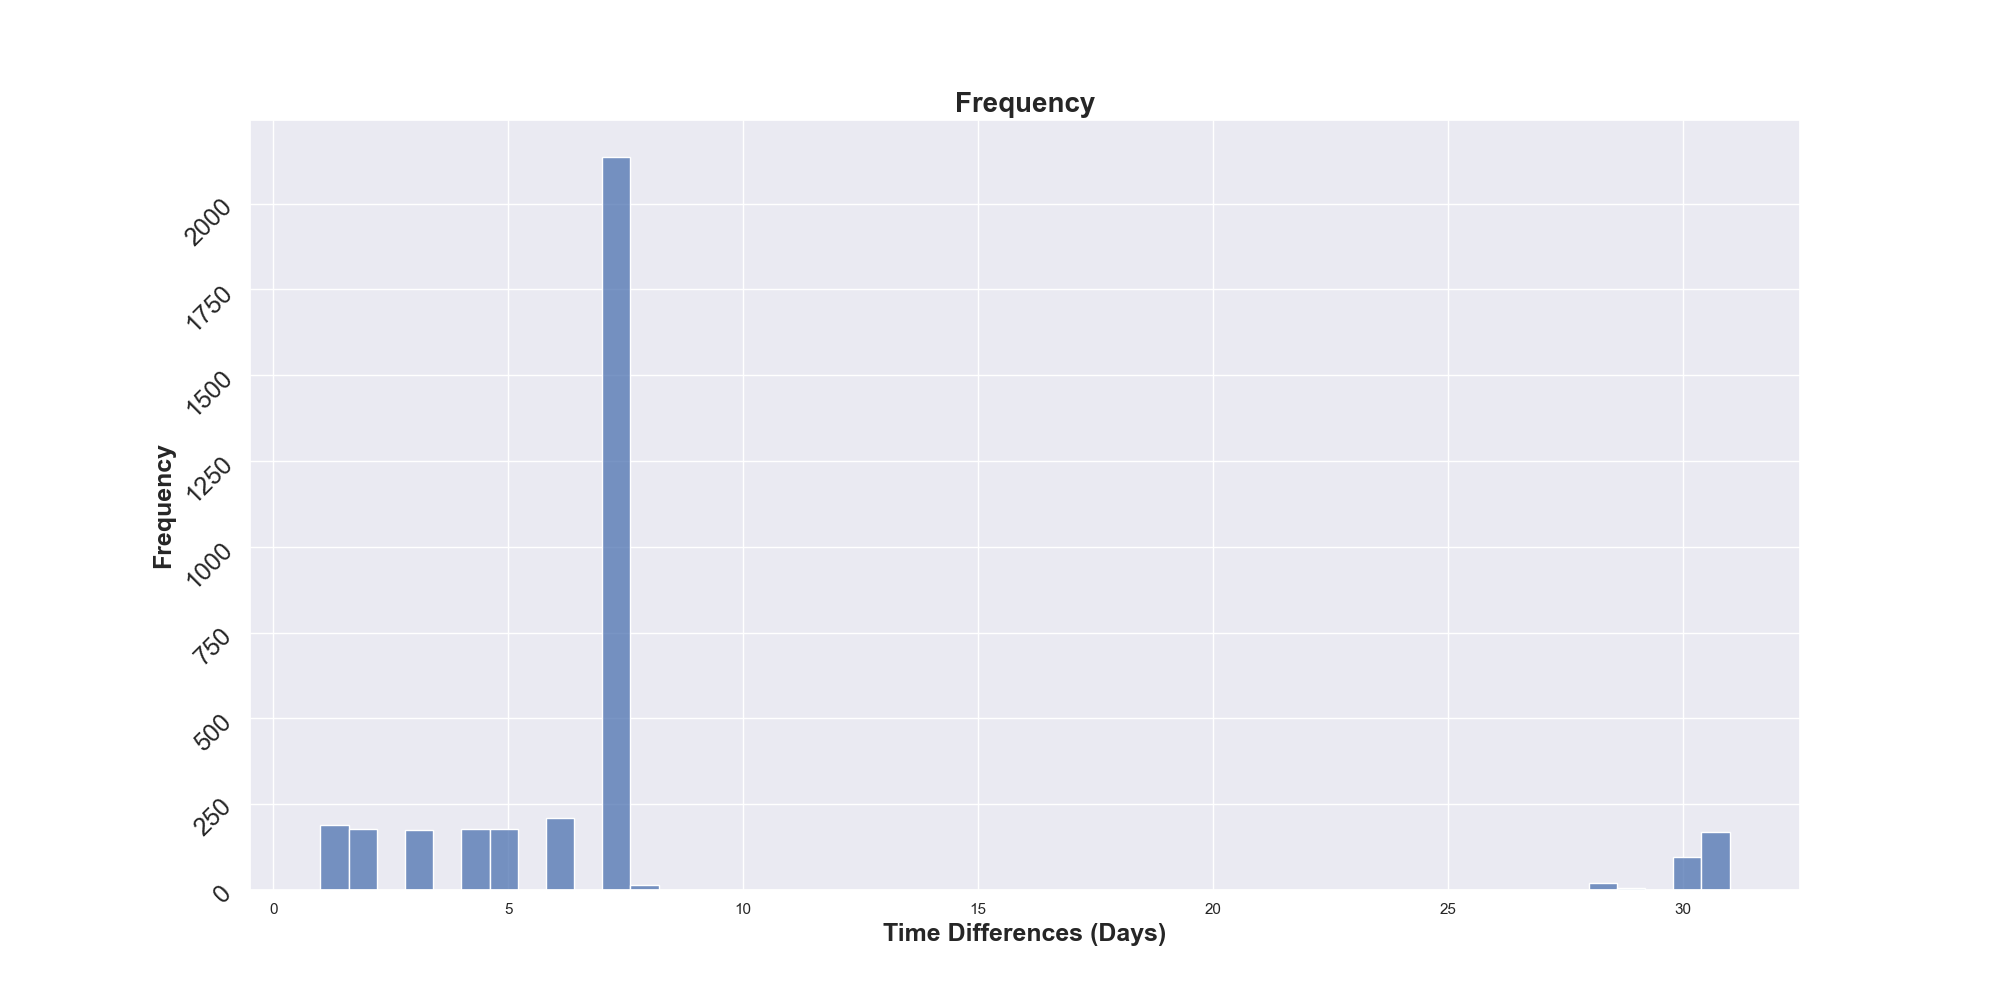

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1947-01-01           NaN       NaN   NaN     NaN
1947-02-01           NaN       NaN   NaN     NaN
1947-03-01           NaN       NaN   NaN     NaN
1947-04-01           NaN       NaN   NaN     NaN
1947-05-01           NaN       NaN   NaN     NaN
...                  ...       ...   ...     ...
2023-04-01           NaN       NaN  3.46     NaN
2023-04-06          6.28       NaN   NaN     NaN
2023-04-13          6.27       NaN   NaN     NaN
2023-04-20          6.39       NaN   NaN     NaN
2023-04-27          6.43       NaN   NaN     NaN

[3551 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': nan, 'FEDFUNDS': nan, 'GS10': nan, 'UNRATE': nan},

In [52]:
config={
    "time_series_outliers": {
        "zscore_threshold": 3,

    },
    "time_series_missing_values":{
        "min_threshold": 2,
    }
}

vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Handling Frequencies.

In [53]:
def identify_frequencies(df):
    """
    Identify the frequency of each series in the DataFrame.

    :param df: Time-series DataFrame
    :return: DataFrame with two columns: 'Variable' and 'Frequency'
    """
    frequencies = []
    for column in df.columns:
        series = df[column].dropna()
        if not series.empty:
            freq = pd.infer_freq(series.index)
            if freq == 'MS' or freq == 'M':
                label = 'Monthly'
            elif freq == 'Q':
                label = 'Quarterly'
            elif freq == 'A':
                label = 'Yearly'
            else:
                label = freq
        else:
            label = None

        frequencies.append({'Variable': column, 'Frequency': label})

    freq_df = pd.DataFrame(frequencies)

    return freq_df

In [54]:
frequencies = identify_frequencies(raw_df)
display(frequencies)

,Variable,Frequency
0,MORTGAGE30US,None
1,FEDFUNDS,Monthly
2,GS10,Monthly
3,UNRATE,Monthly


Resample.

In [55]:
preprocessed_df = raw_df.resample('MS').last()
frequencies = identify_frequencies(preprocessed_df)
display(frequencies)

,Variable,Frequency
0,MORTGAGE30US,Monthly
1,FEDFUNDS,Monthly
2,GS10,Monthly
3,UNRATE,Monthly


Run Data Quality Test Plan.

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...



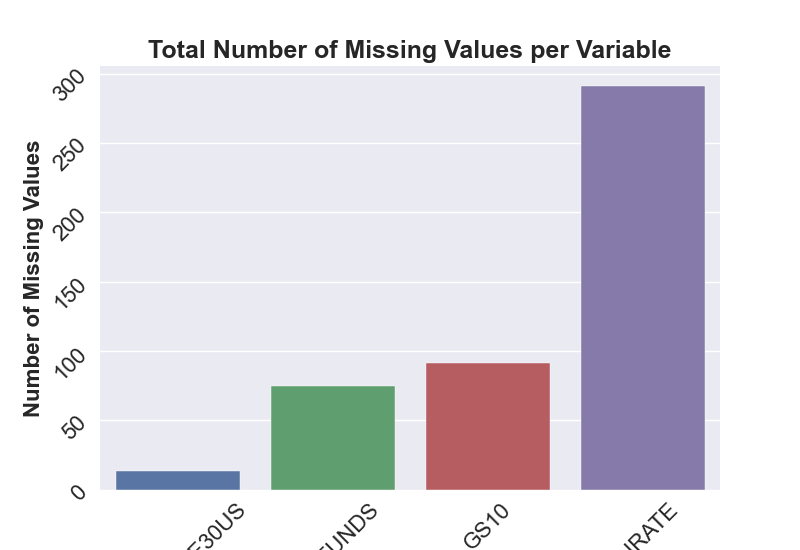
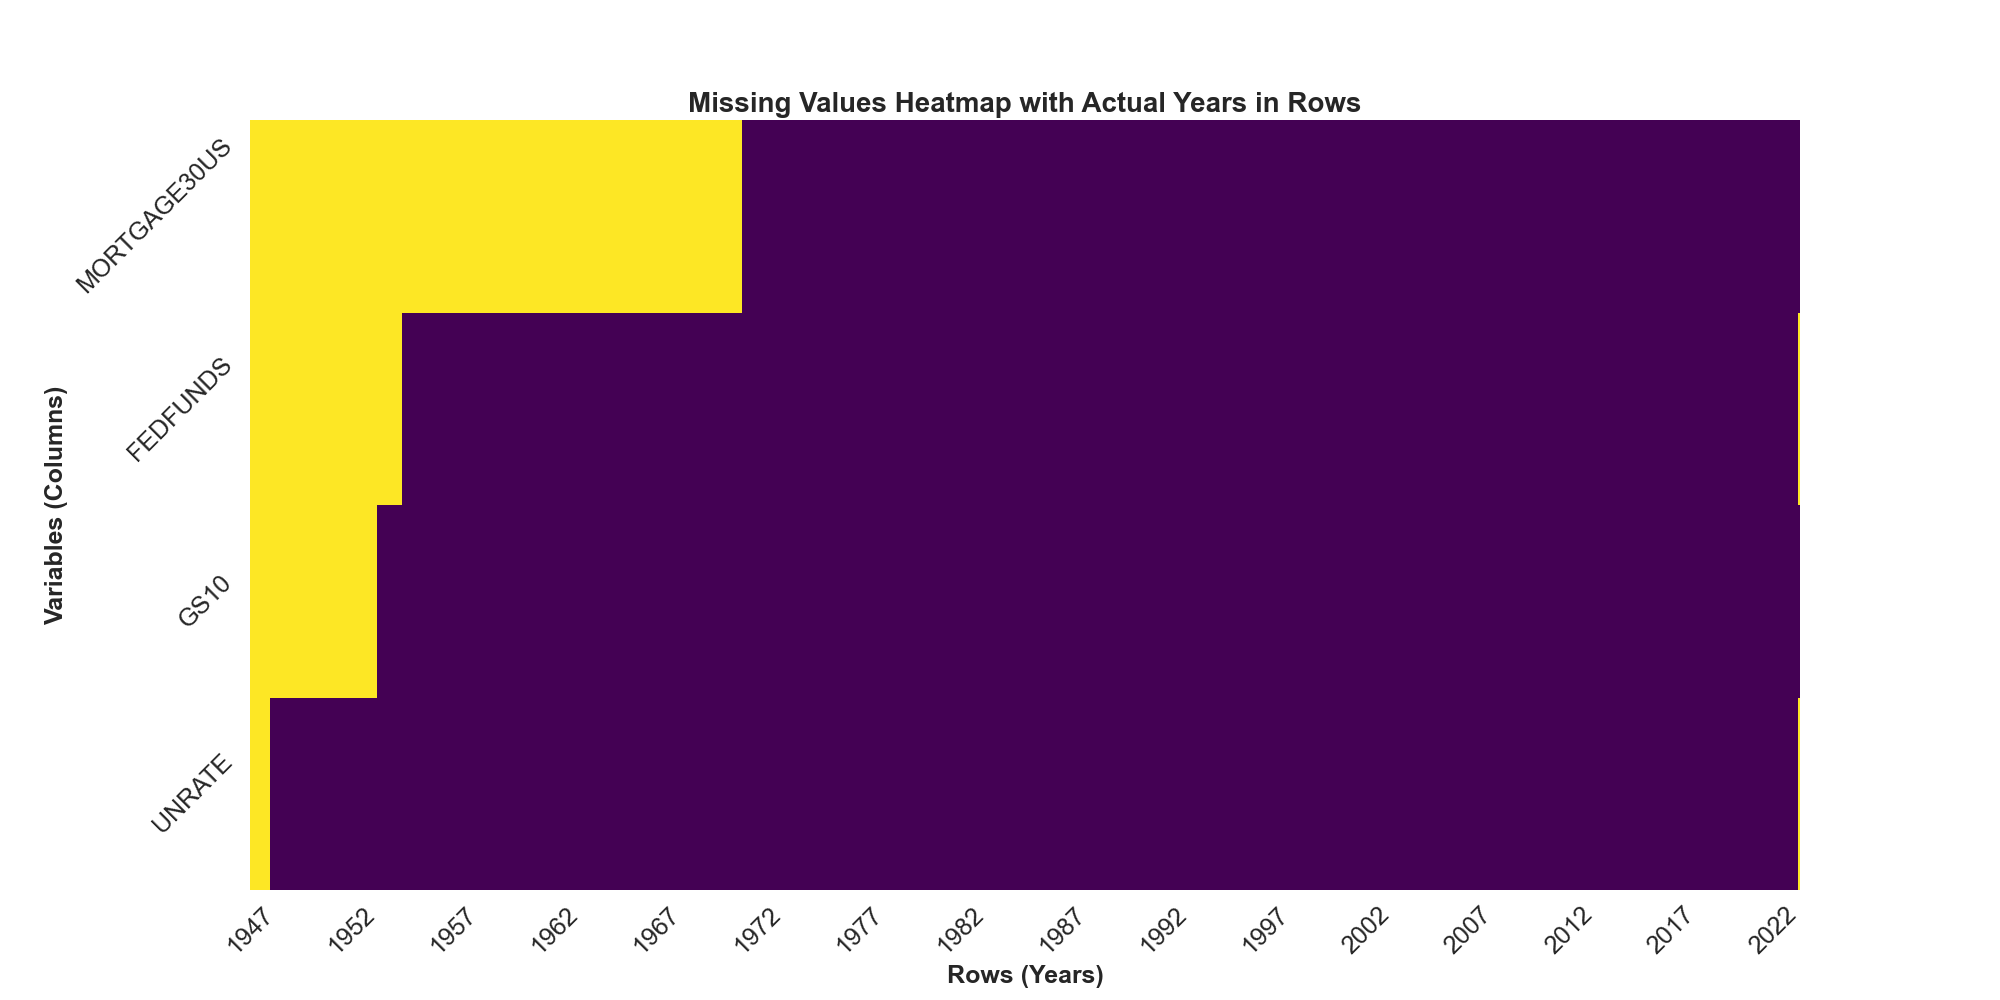
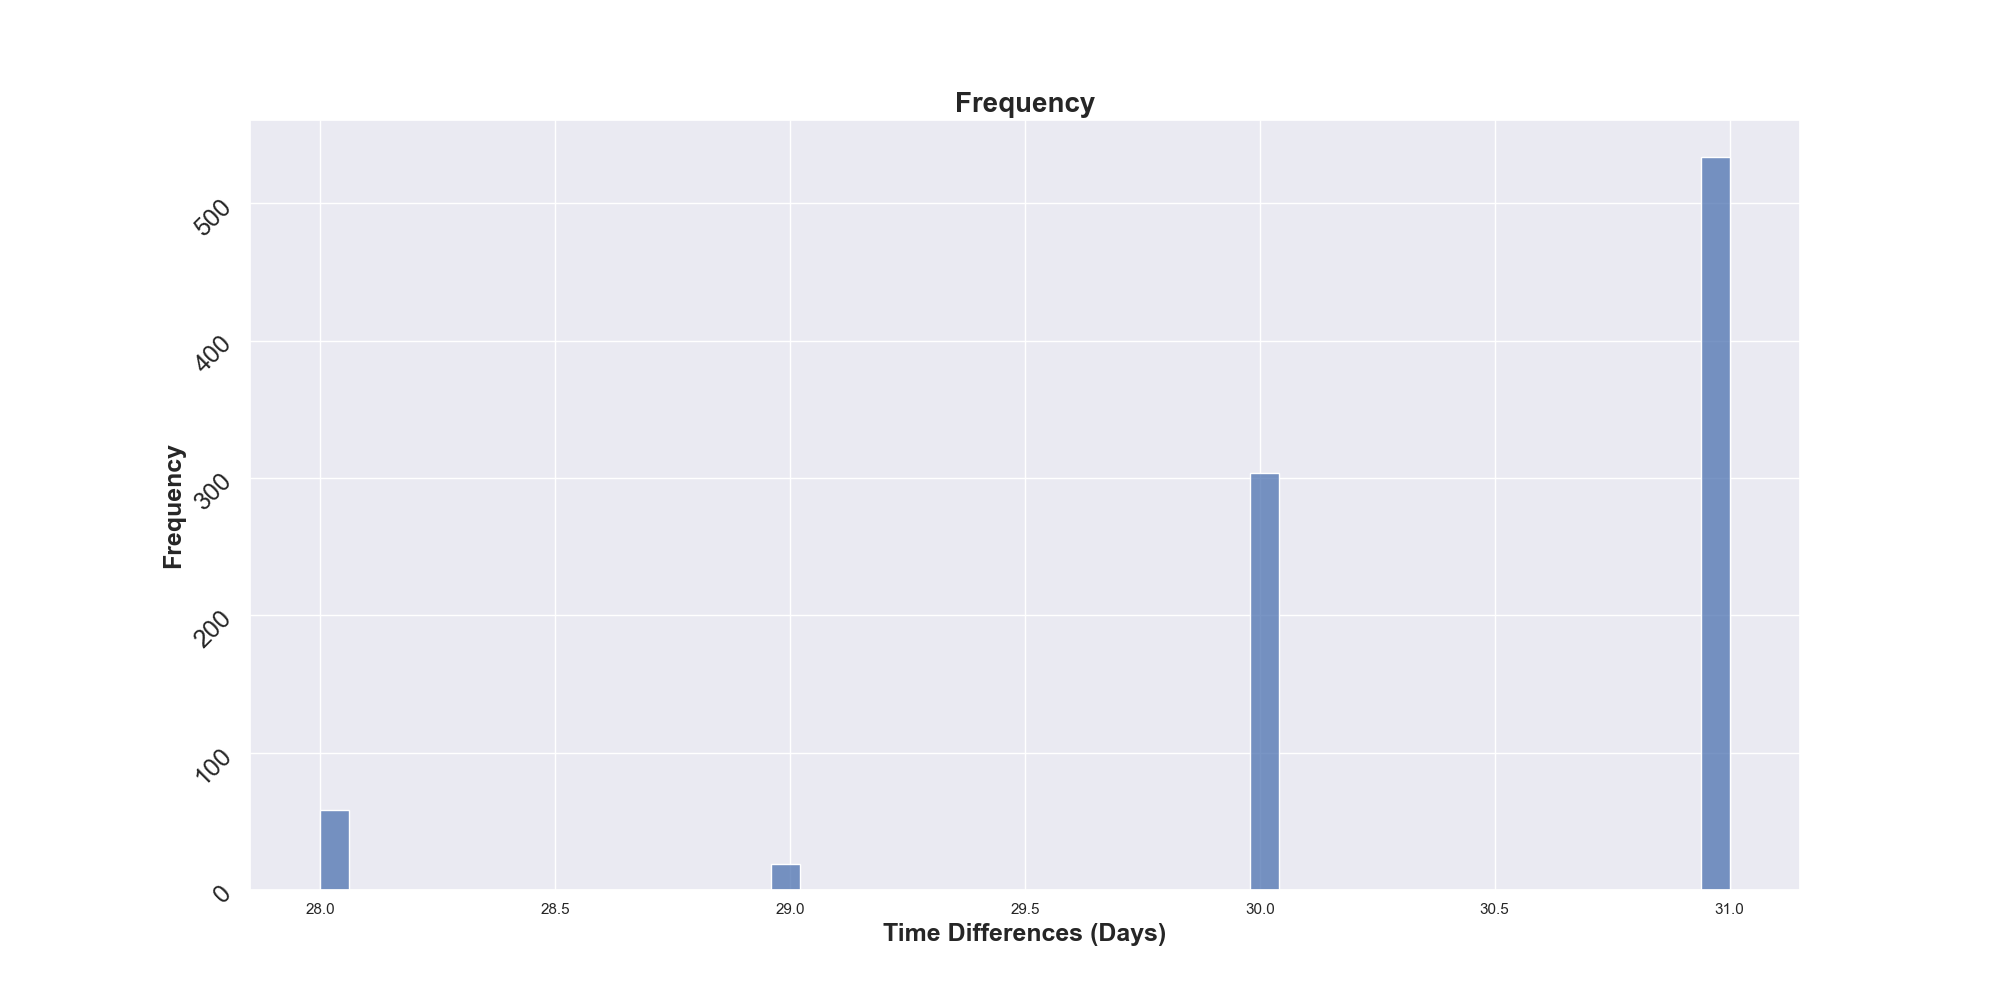

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1947-01-01           NaN       NaN   NaN     NaN
1947-02-01           NaN       NaN   NaN     NaN
1947-03-01           NaN       NaN   NaN     NaN
1947-04-01           NaN       NaN   NaN     NaN
1947-05-01           NaN       NaN   NaN     NaN
...                  ...       ...   ...     ...
2022-12-01          6.42      4.10  3.62     3.5
2023-01-01          6.13      4.33  3.53     3.4
2023-02-01          6.50      4.57  3.75     3.6
2023-03-01          6.32      4.65  3.66     3.5
2023-04-01          6.43       NaN  3.46     NaN

[916 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': nan, 'FEDFUNDS': nan, 'GS10': nan, 'UNRATE': nan}, 

In [56]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column=target_column
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Remove missing values.

In [57]:
preprocessed_df = preprocessed_df.dropna()

Run Data Quality Test Plan. 

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...



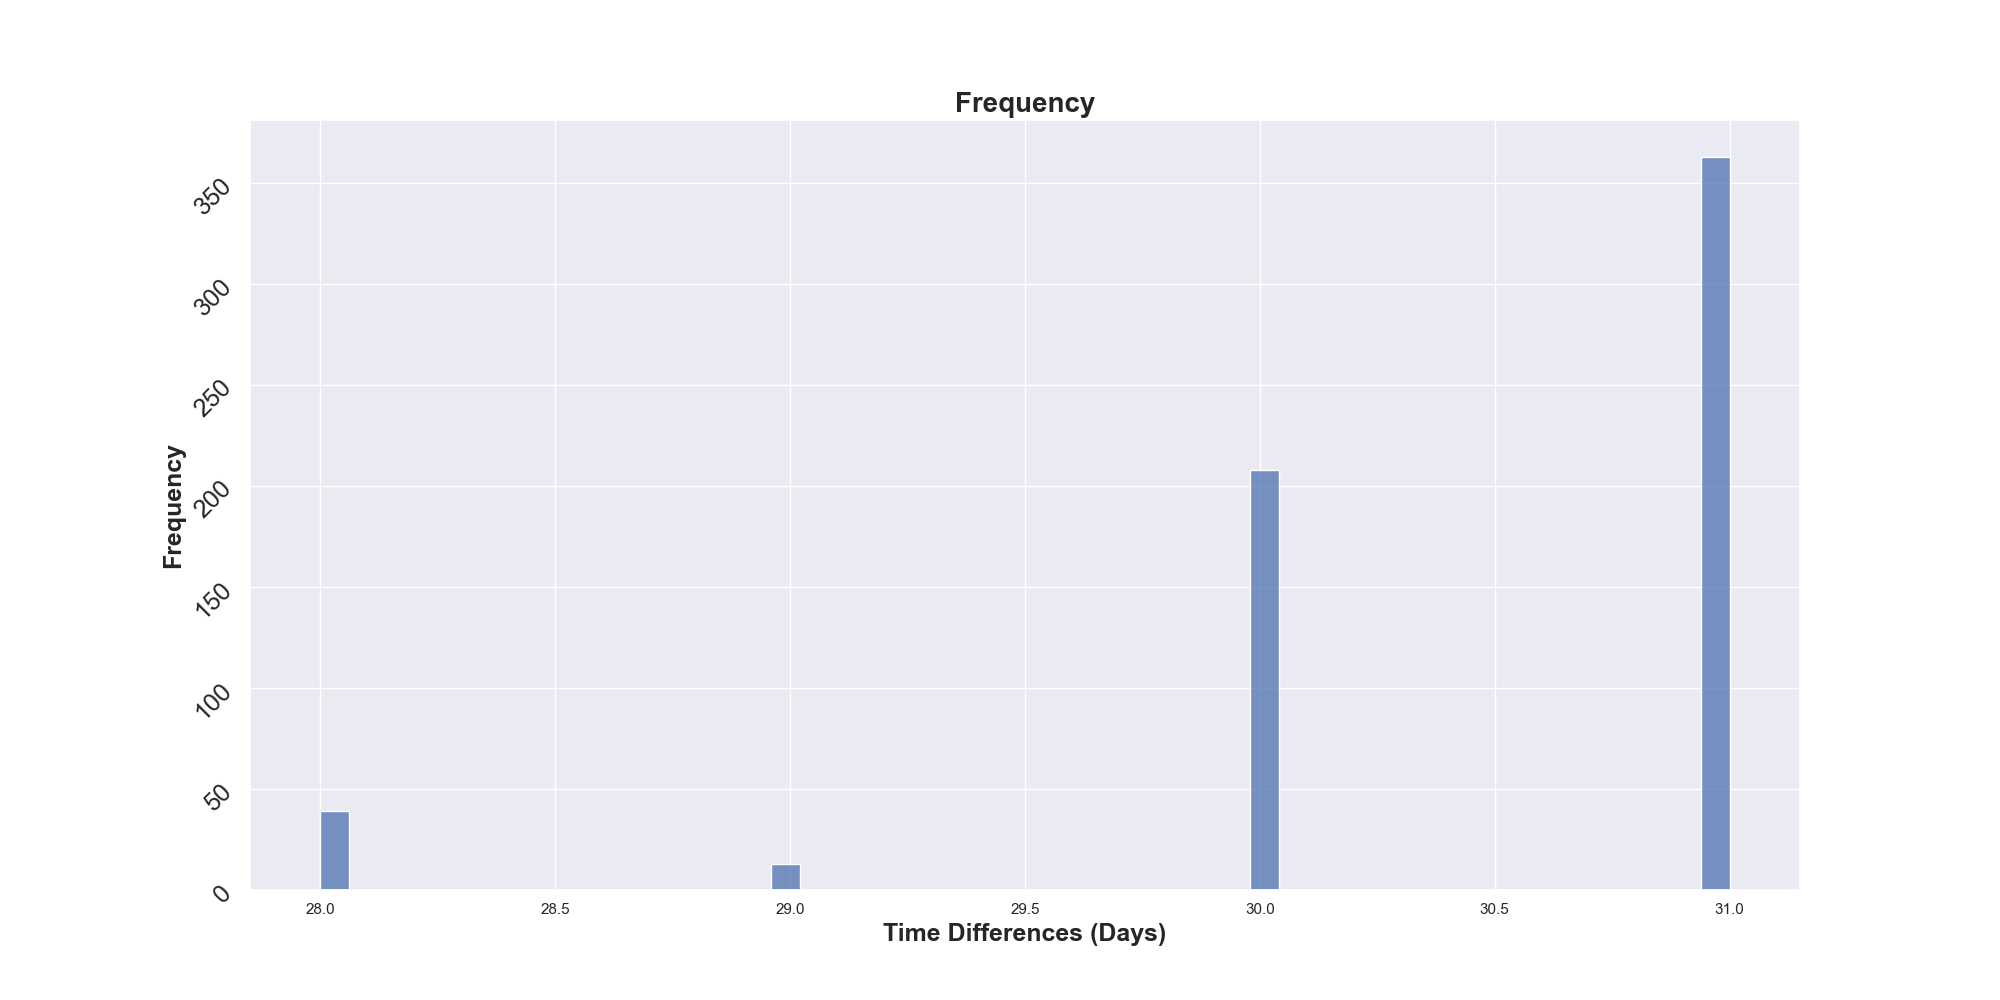

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1971-04-01          7.29      4.16  5.83     5.9
1971-05-01          7.46      4.63  6.39     5.9
1971-06-01          7.54      4.91  6.52     5.9
1971-07-01          7.69      5.31  6.73     6.0
1971-08-01          7.69      5.57  6.58     6.1
...                  ...       ...   ...     ...
2022-11-01          6.58      3.78  3.89     3.6
2022-12-01          6.42      4.10  3.62     3.5
2023-01-01          6.13      4.33  3.53     3.4
2023-02-01          6.50      4.57  3.75     3.6
2023-03-01          6.32      4.65  3.66     3.5

[624 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.29, 'FEDFUNDS': 4.16, 'GS10': 5.83, 'UNRATE': 5.9

In [58]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column=target_column
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

## Exploratory Data Analysis

### Univariate Analysis

#### Run Time Series Univariate Test Plan

In [59]:
vm.test_plans.describe_plan("time_series_univariate")

Attribute,Value
ID,time_series_univariate
Name,TimeSeriesUnivariate
Description,Test plan to perform time series univariate analysis.
Required Context,['dataset']
Tests,"TimeSeriesLinePlot (Metric), TimeSeriesHistogram (Metric), ACFandPACFPlot (Metric), RollingStatsPlot (Metric)"
Test Plans,[]


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



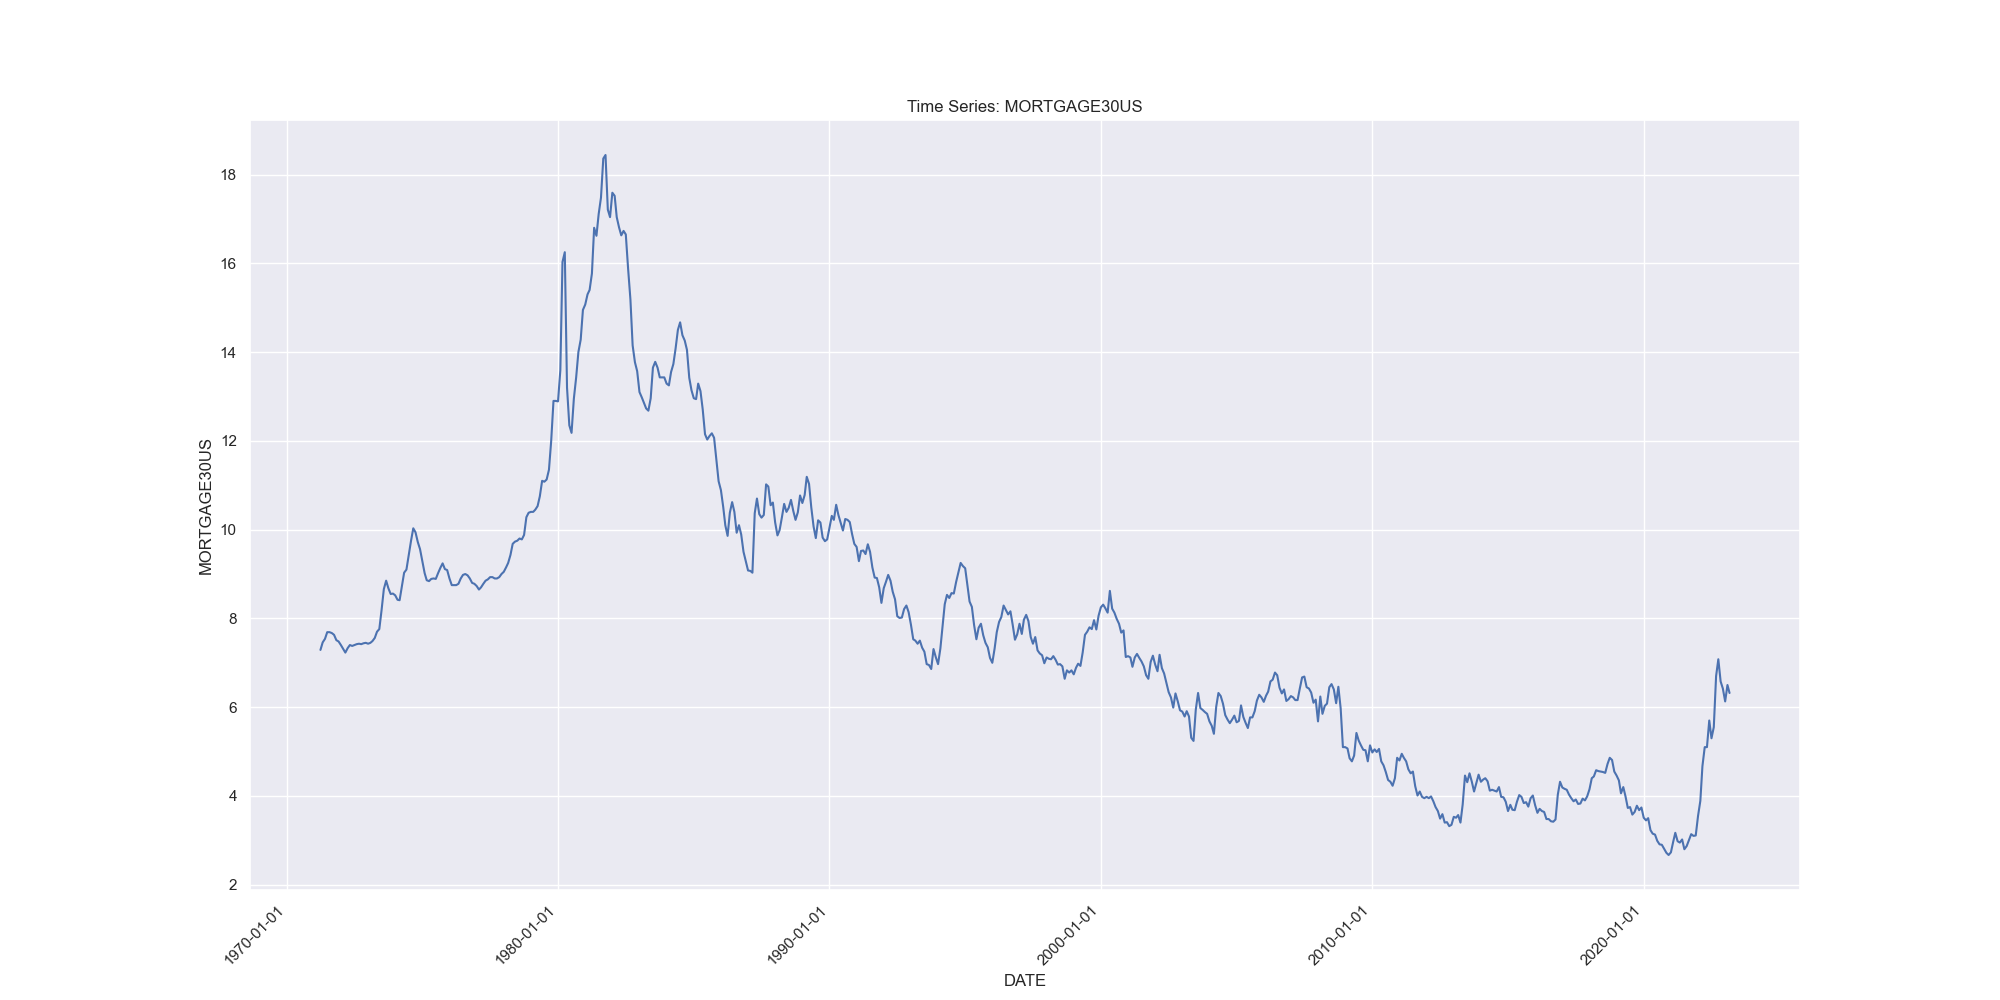
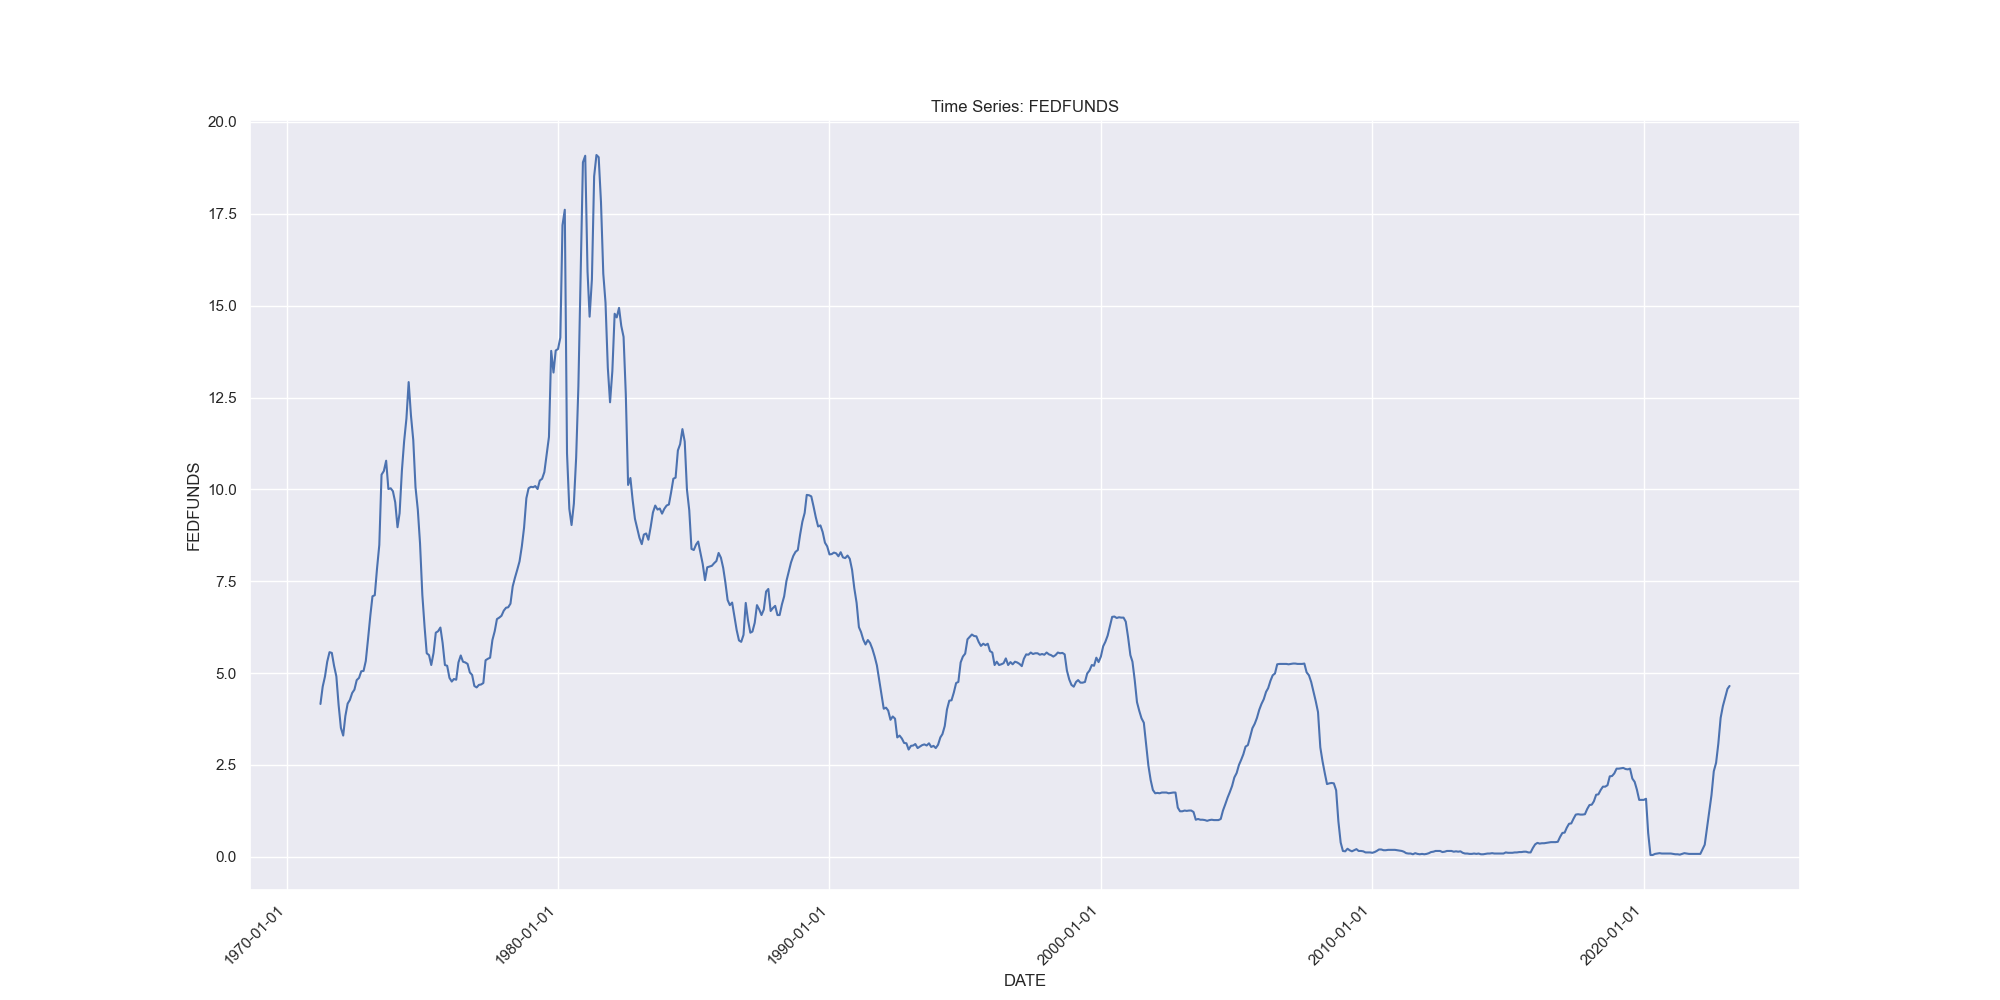
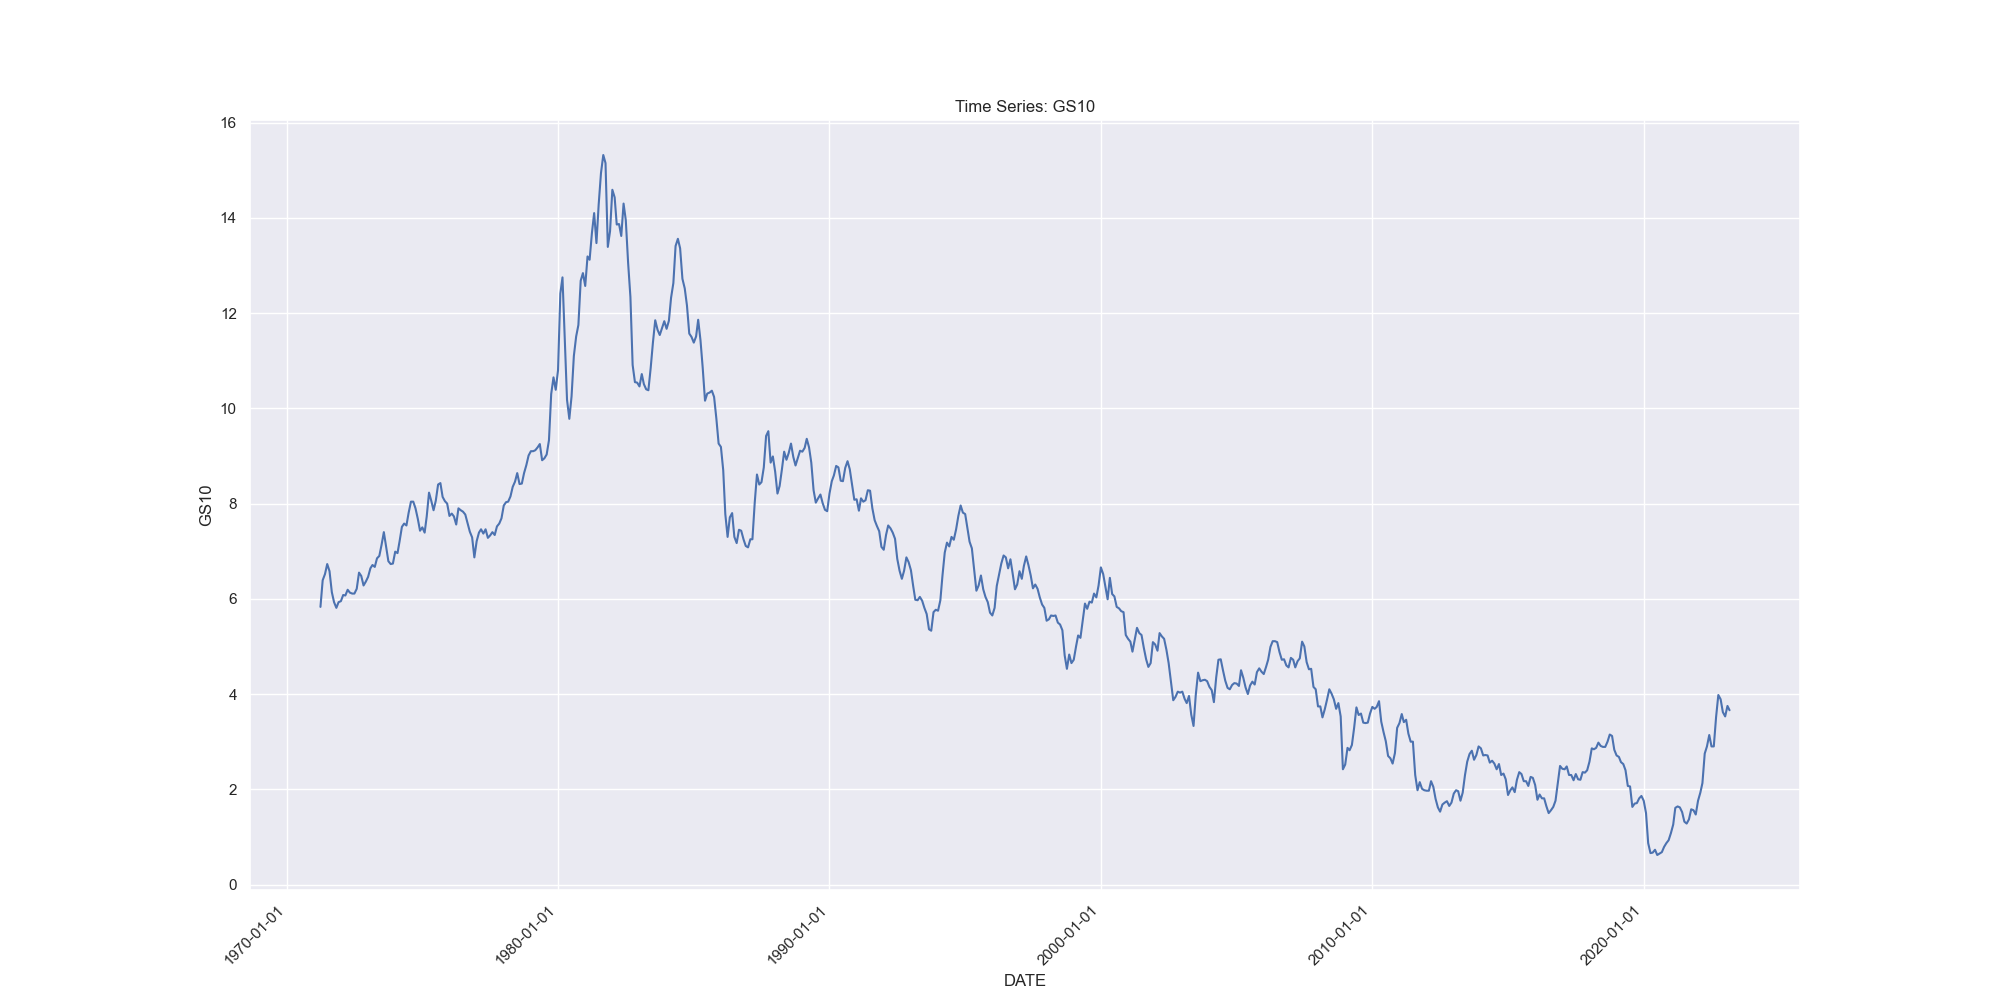
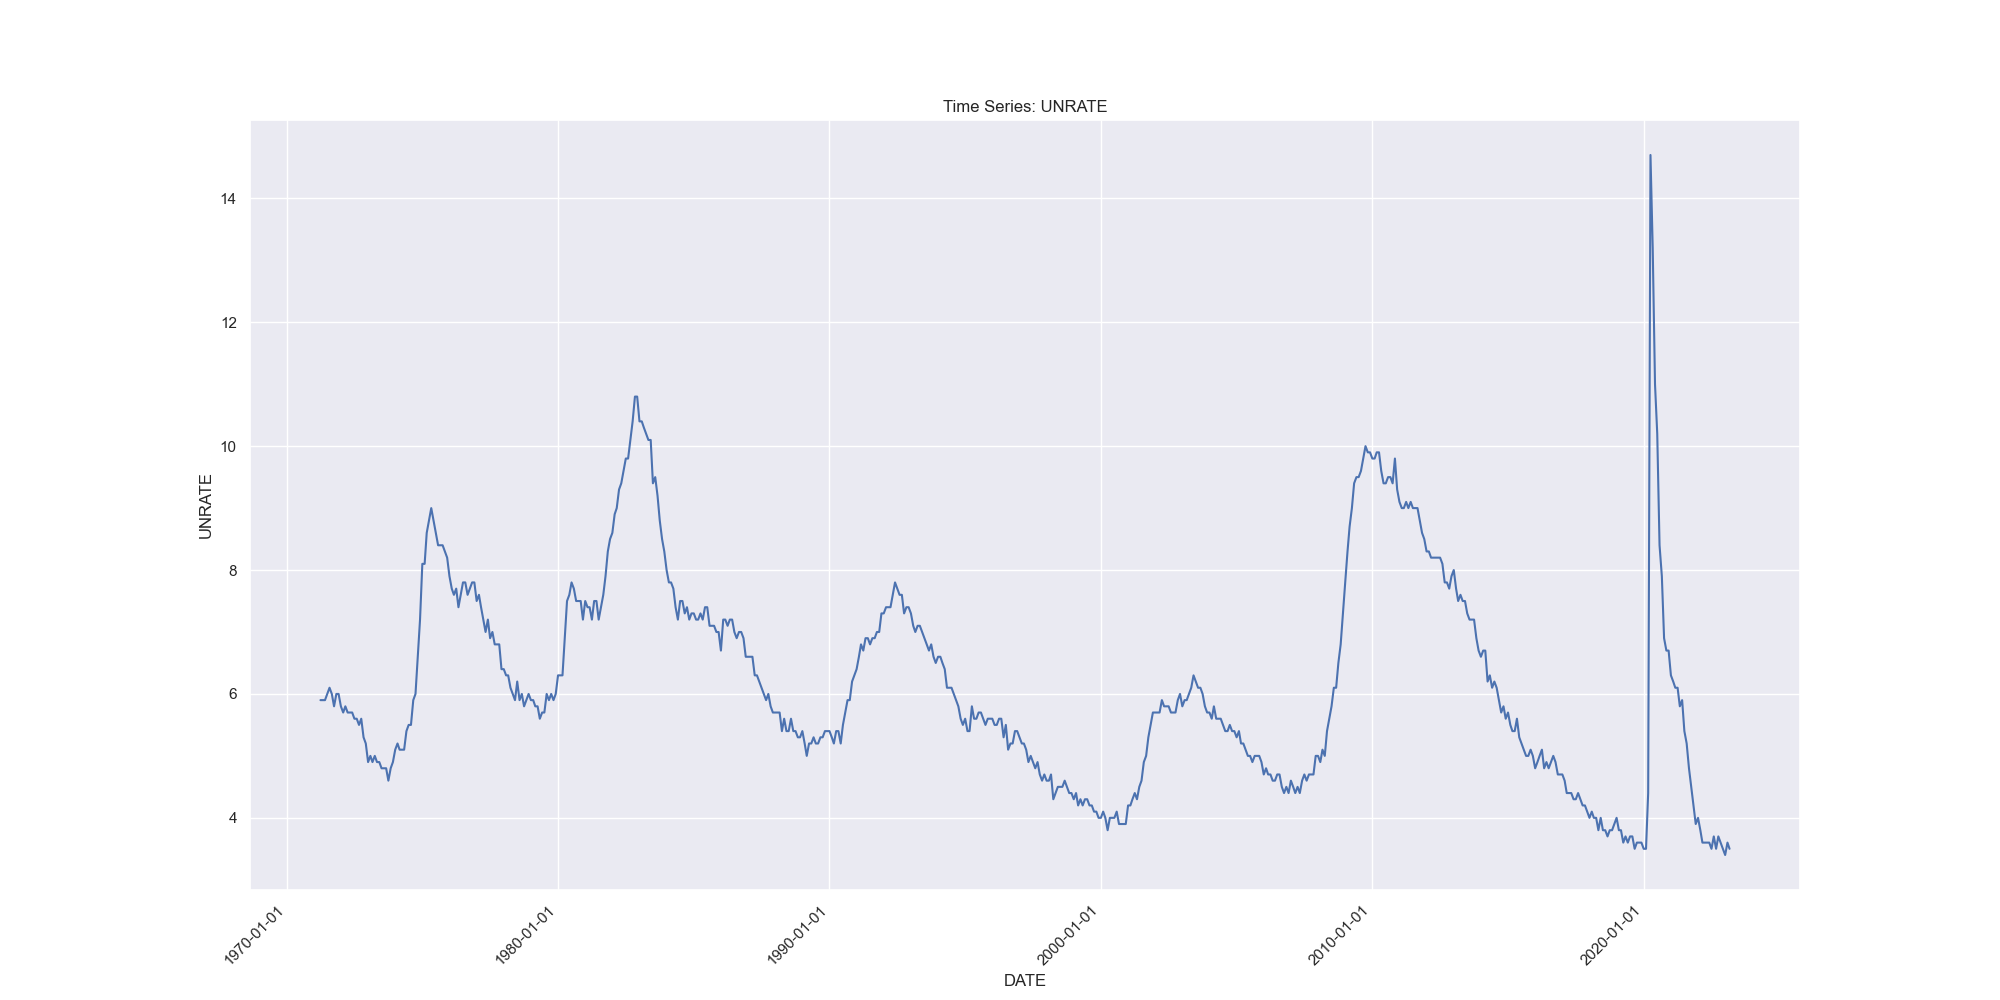
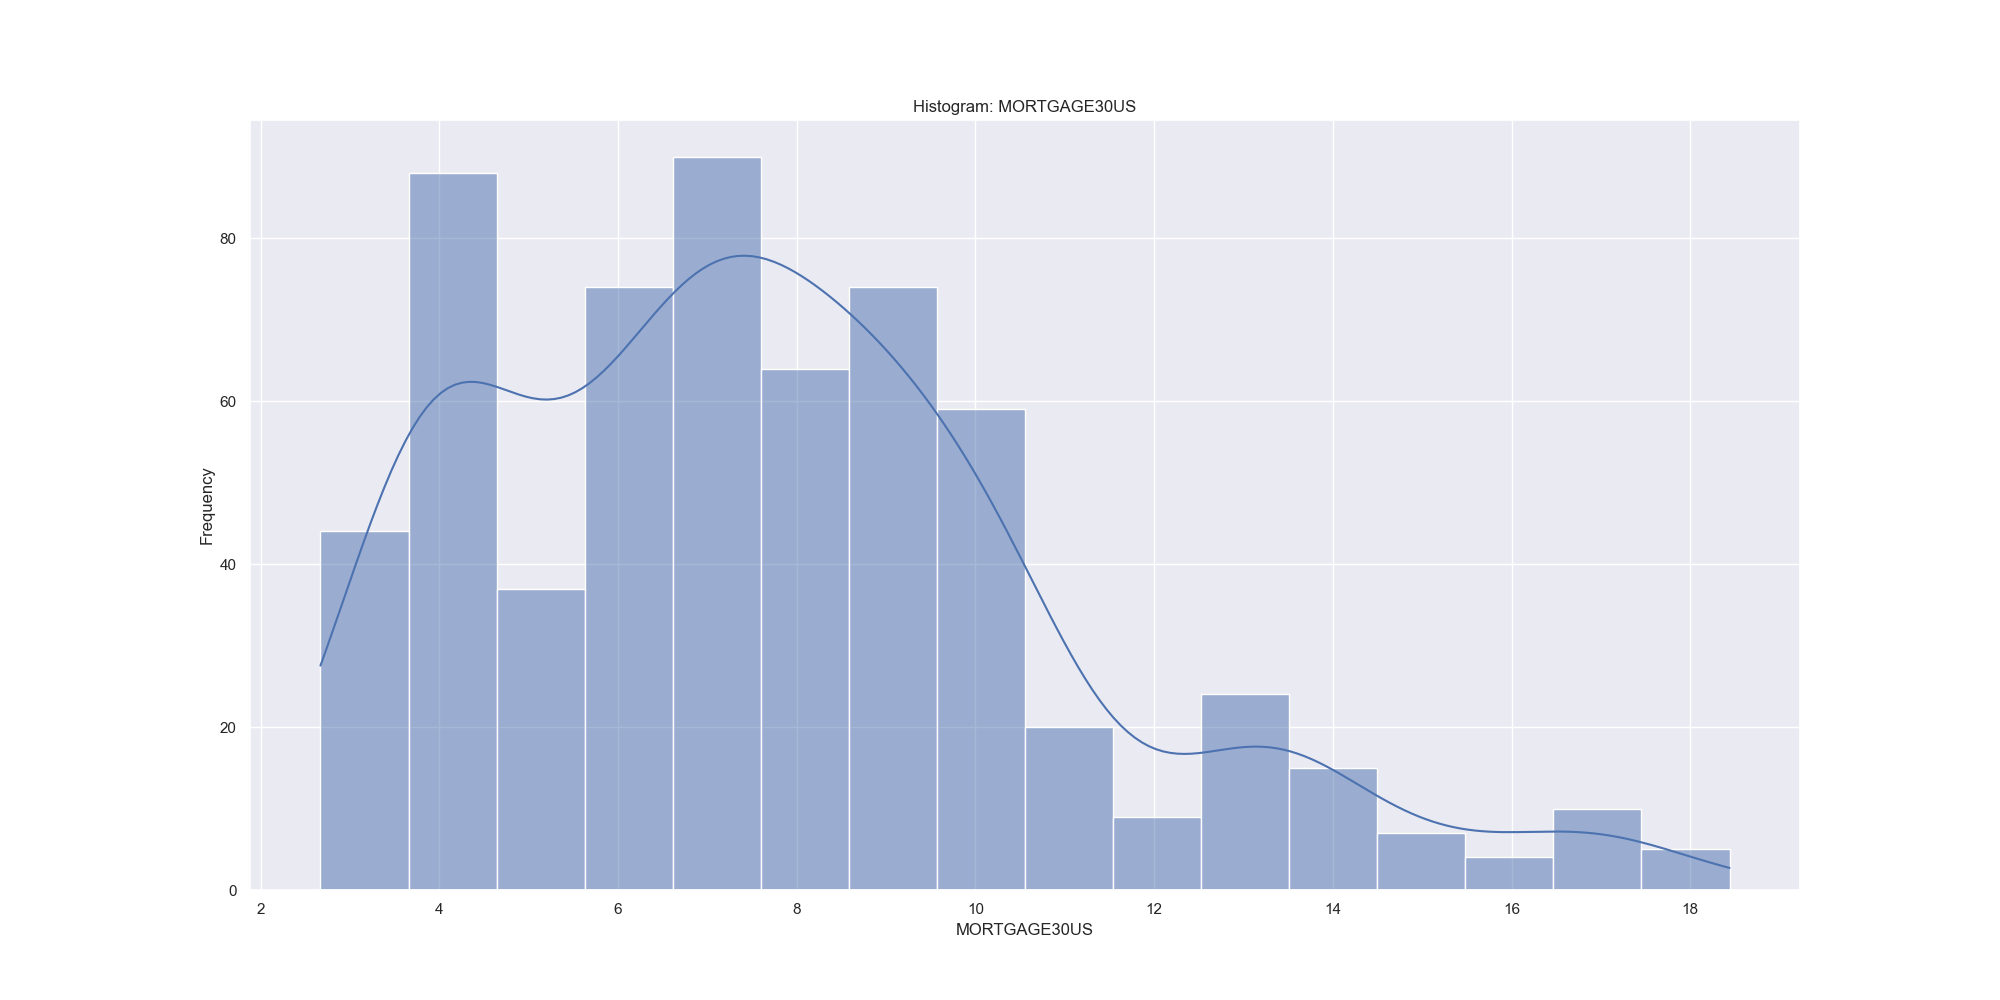
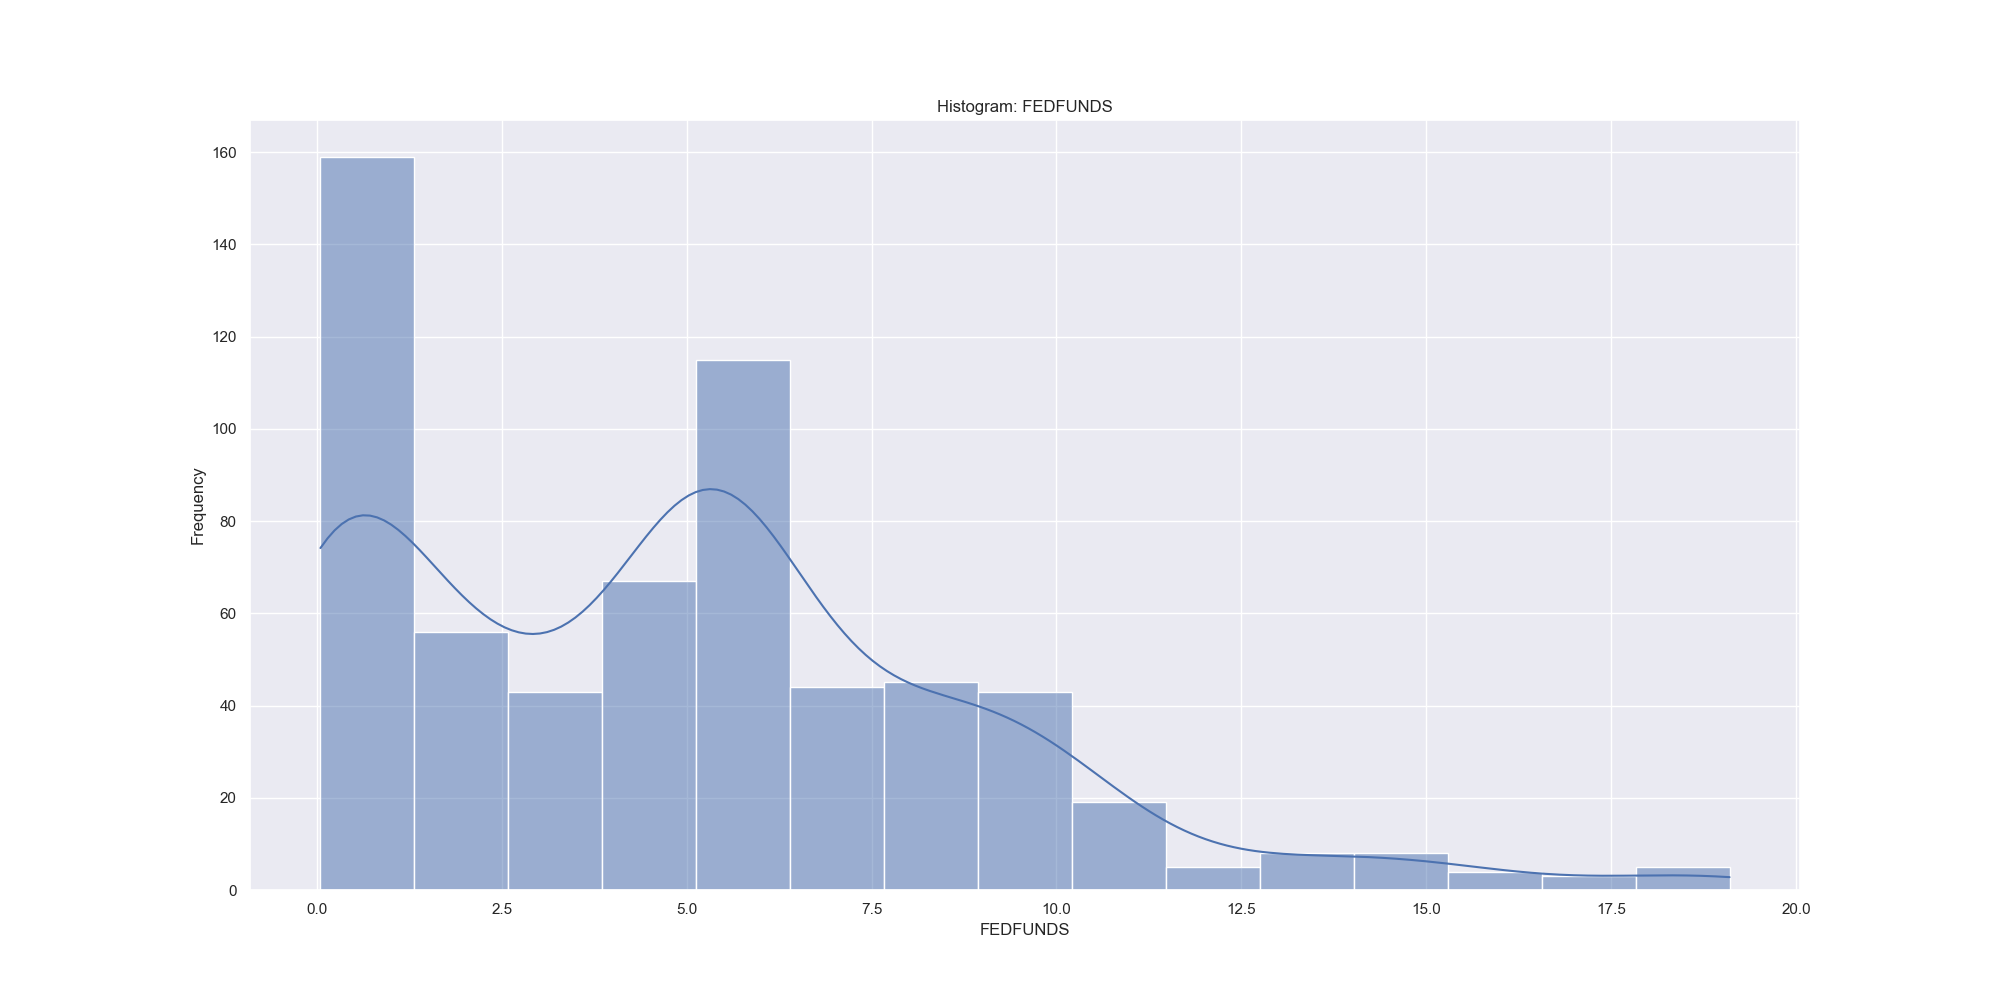
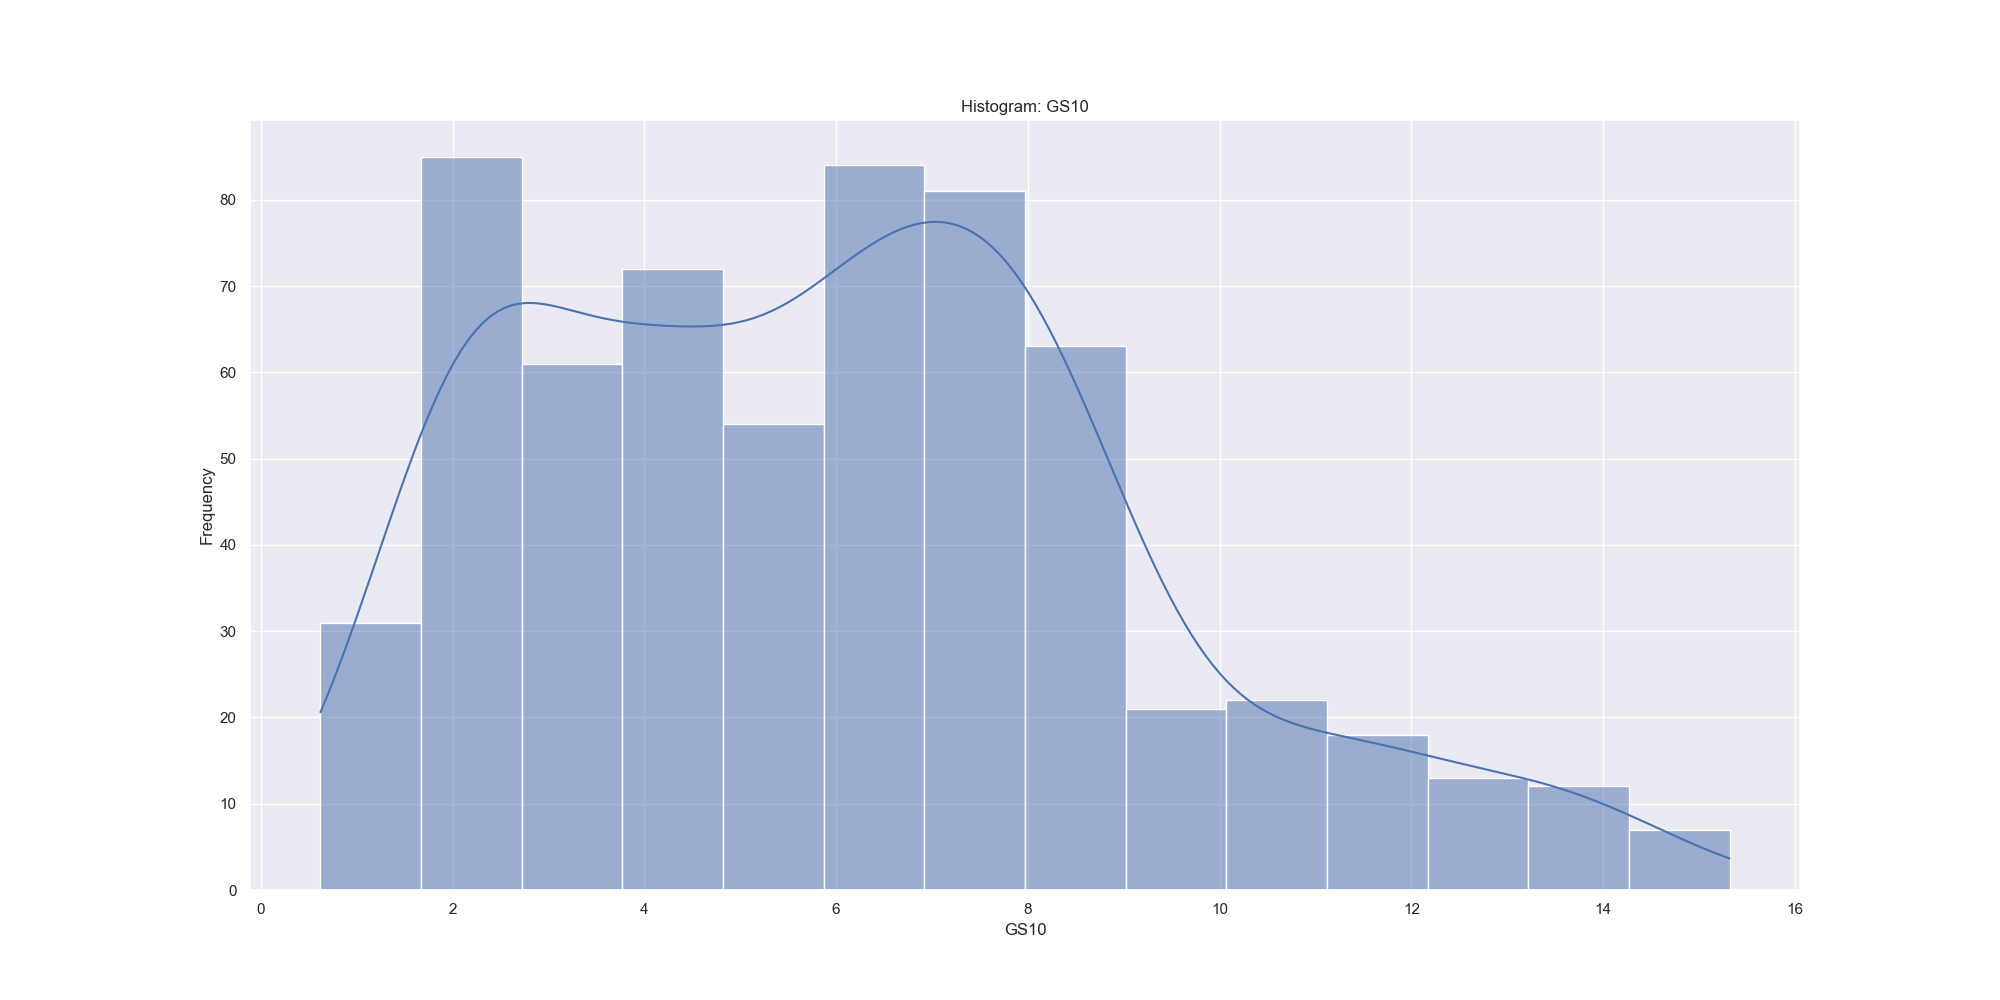
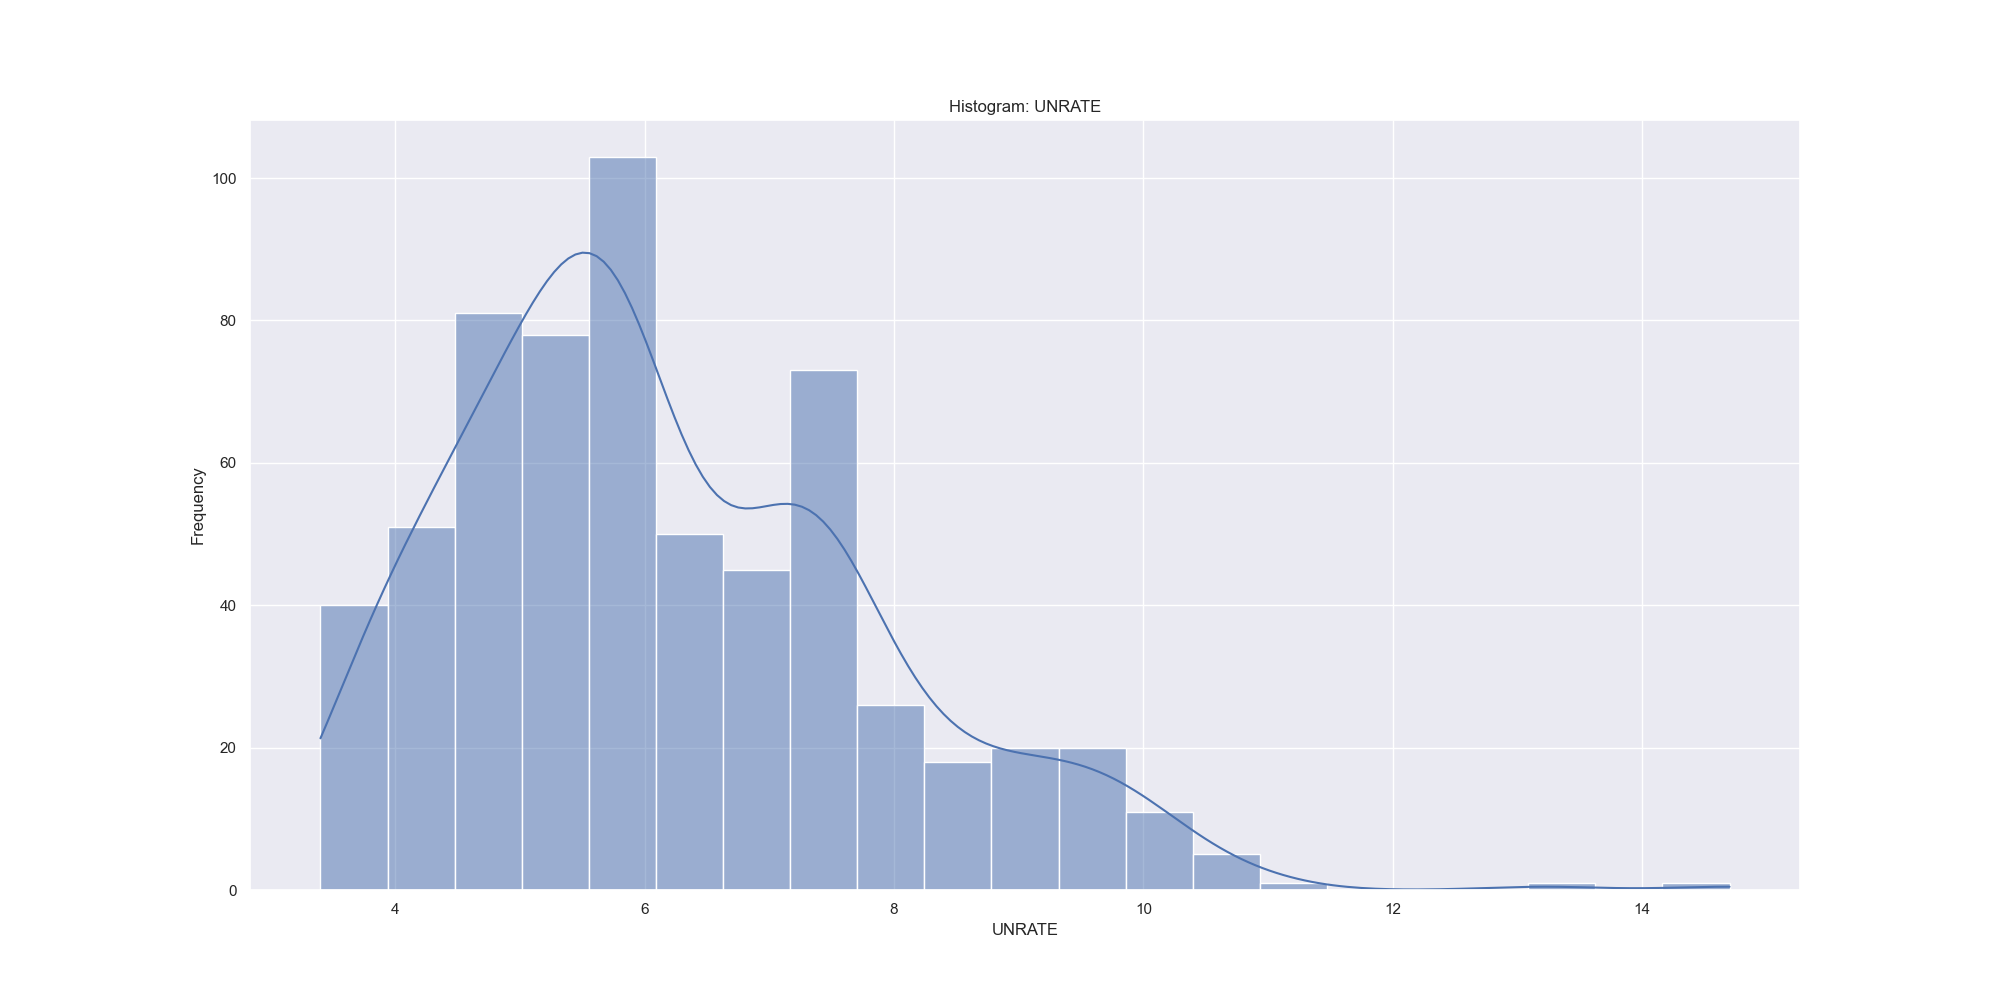
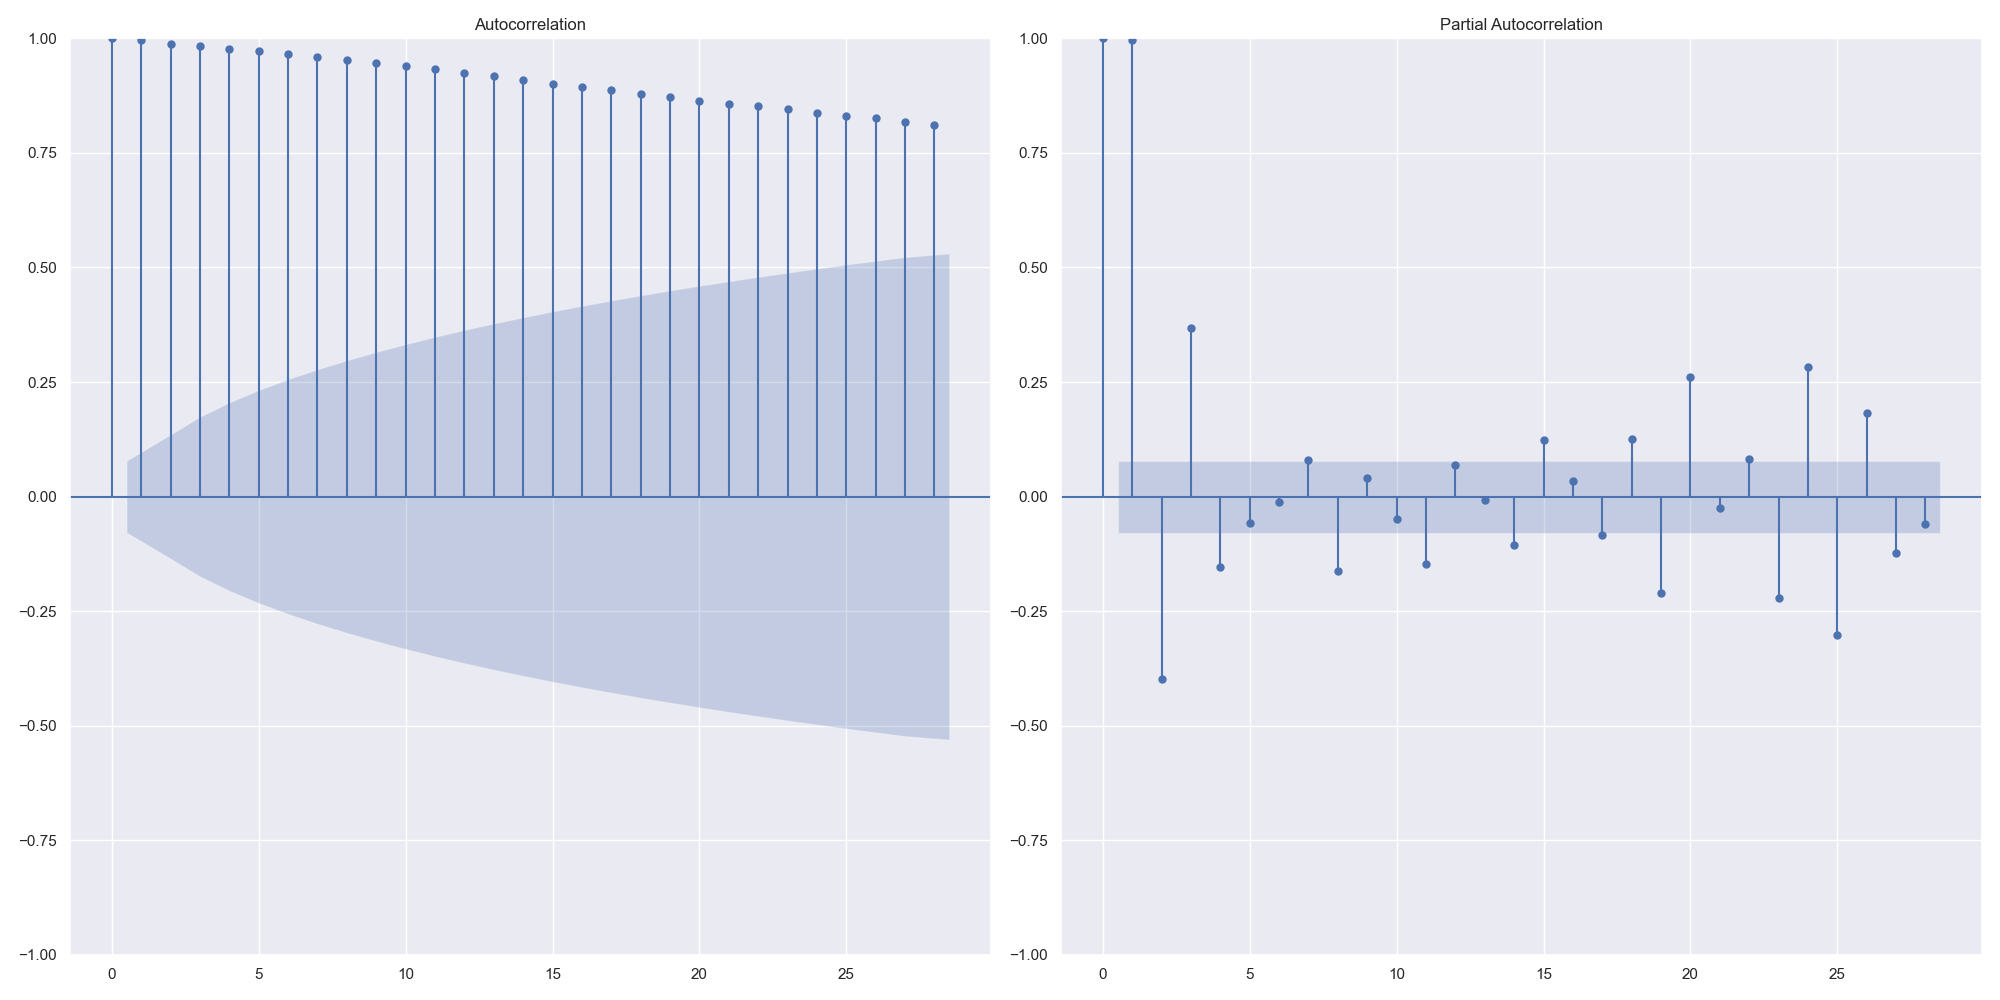
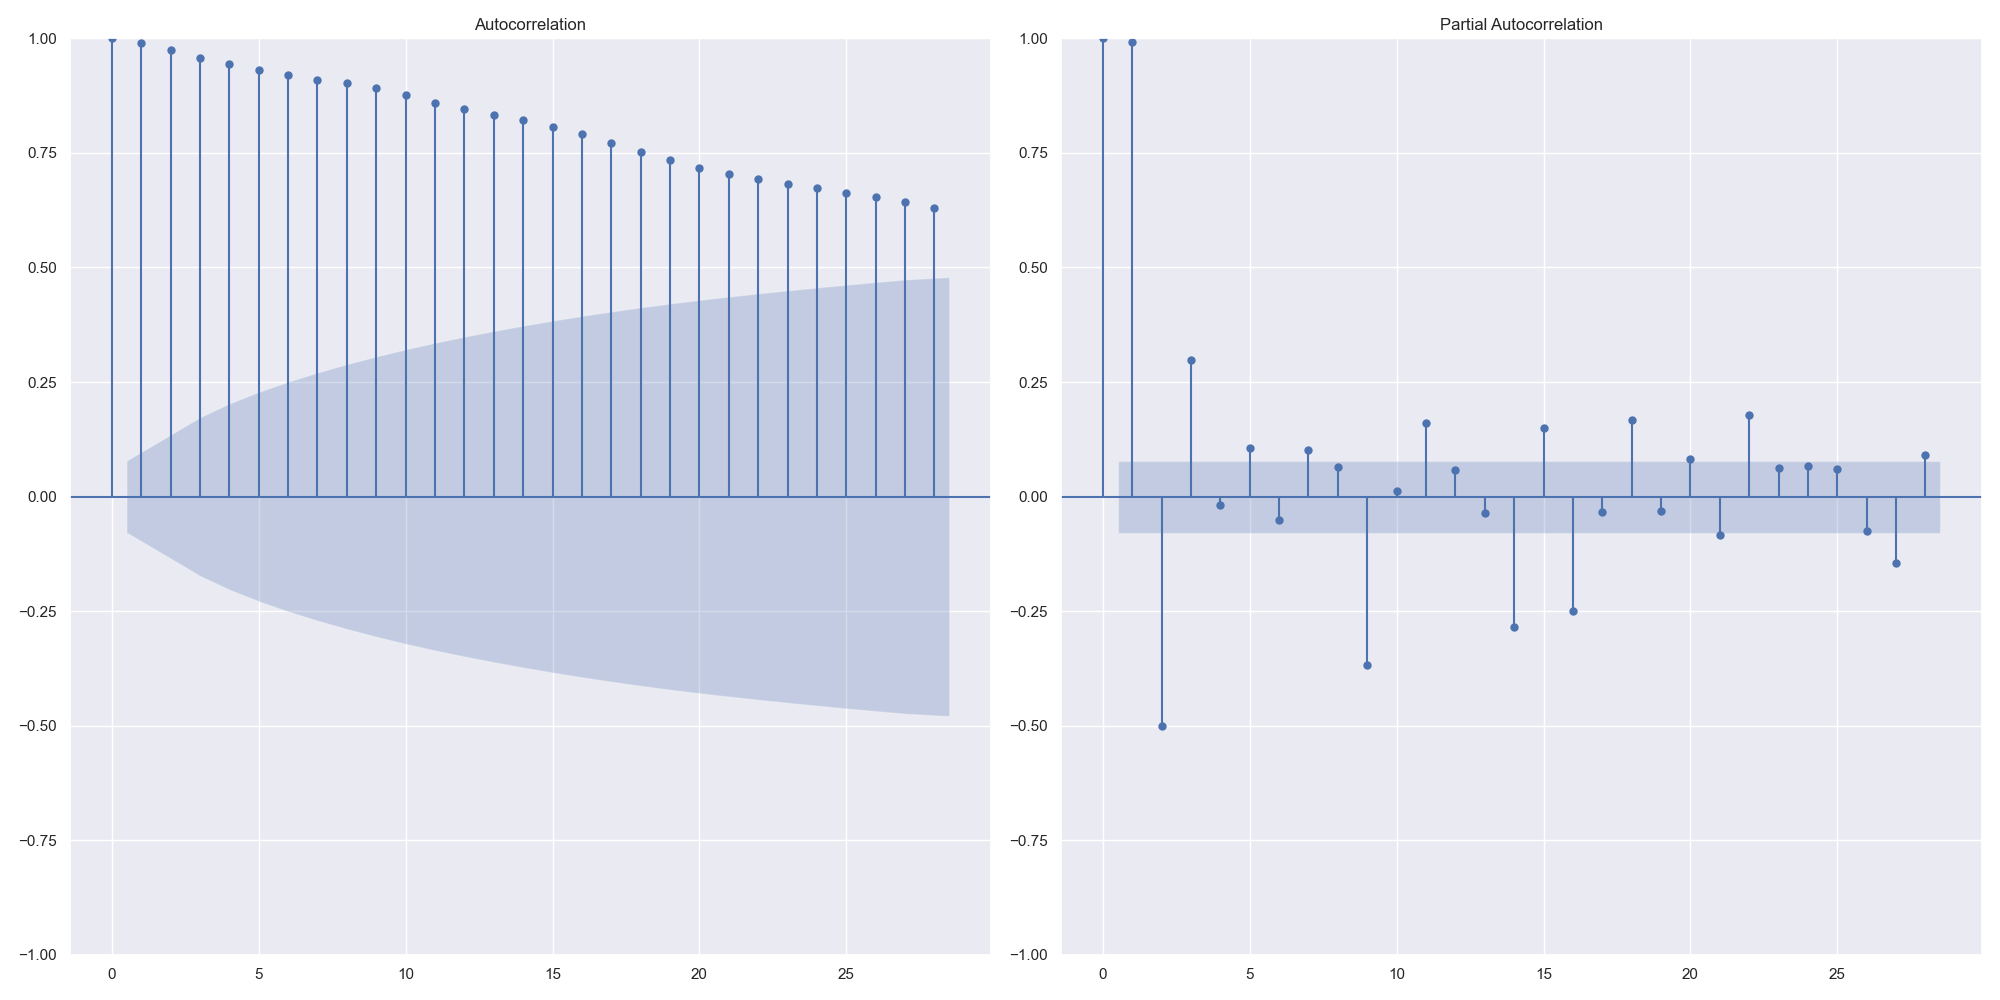
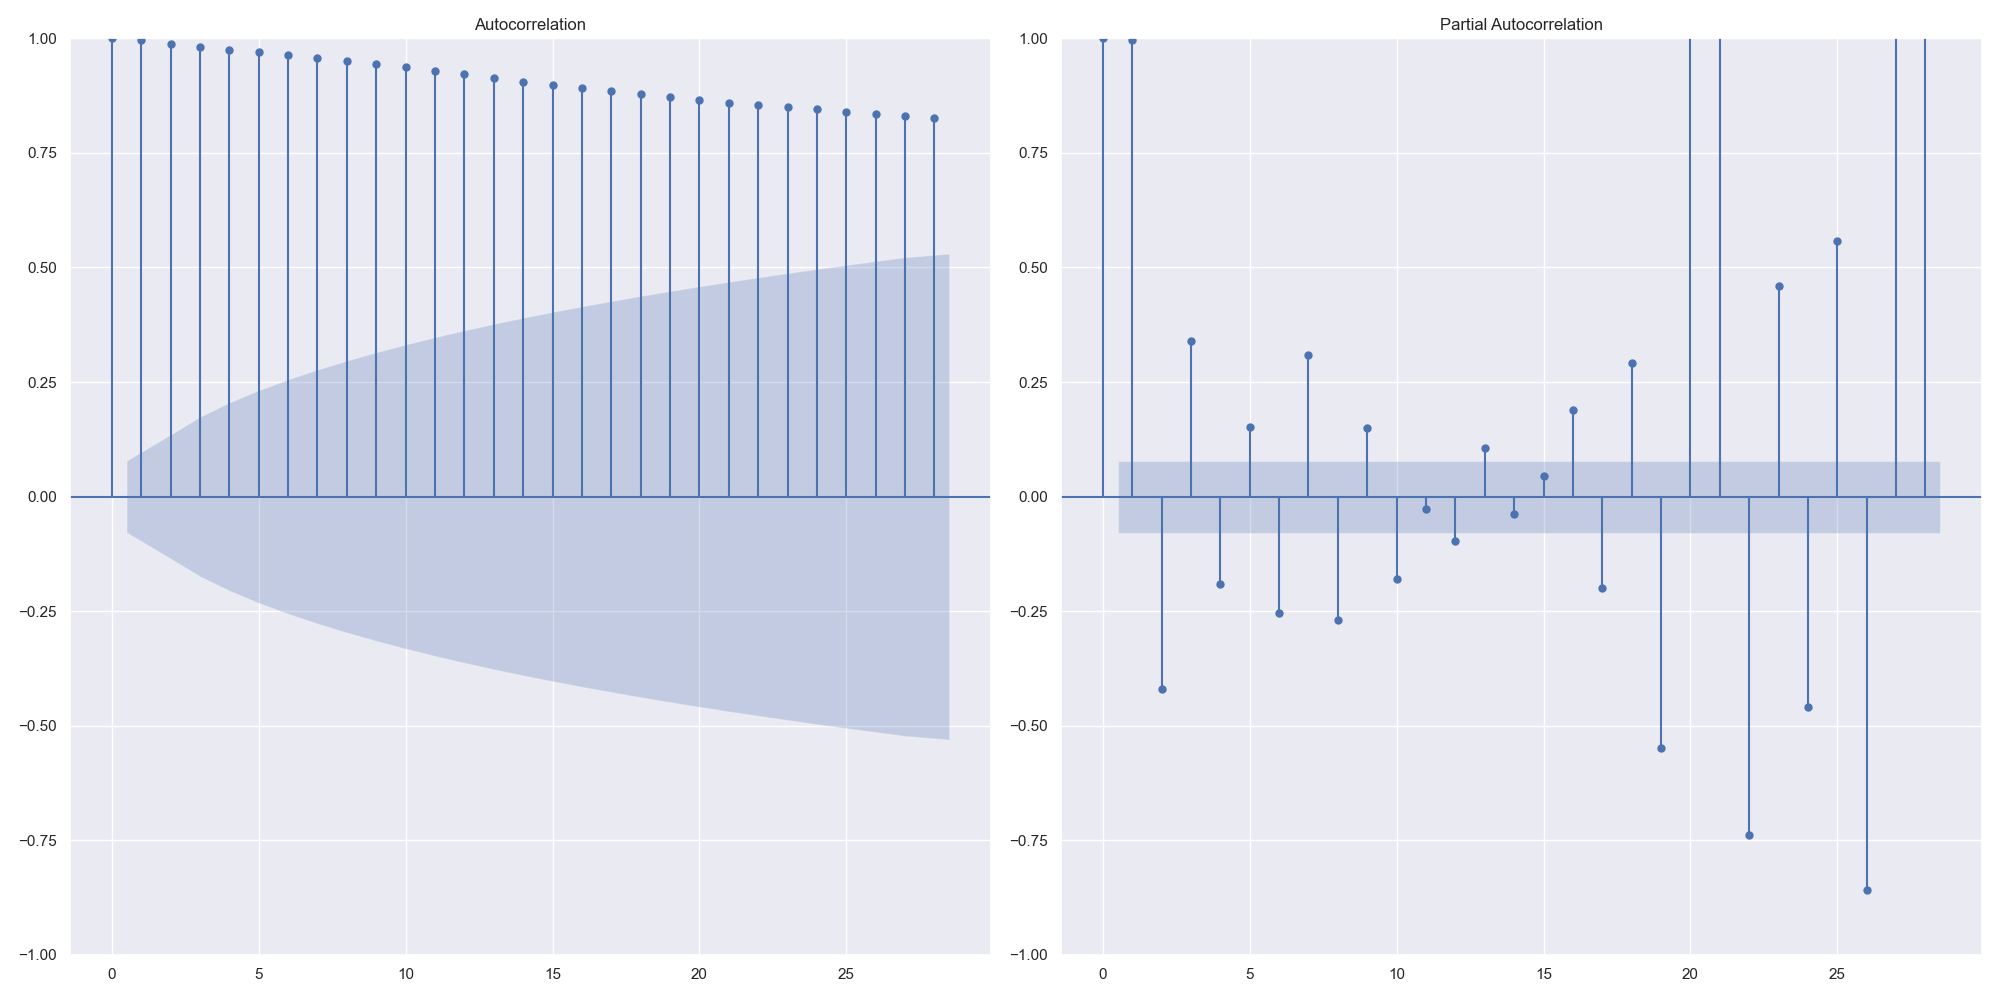
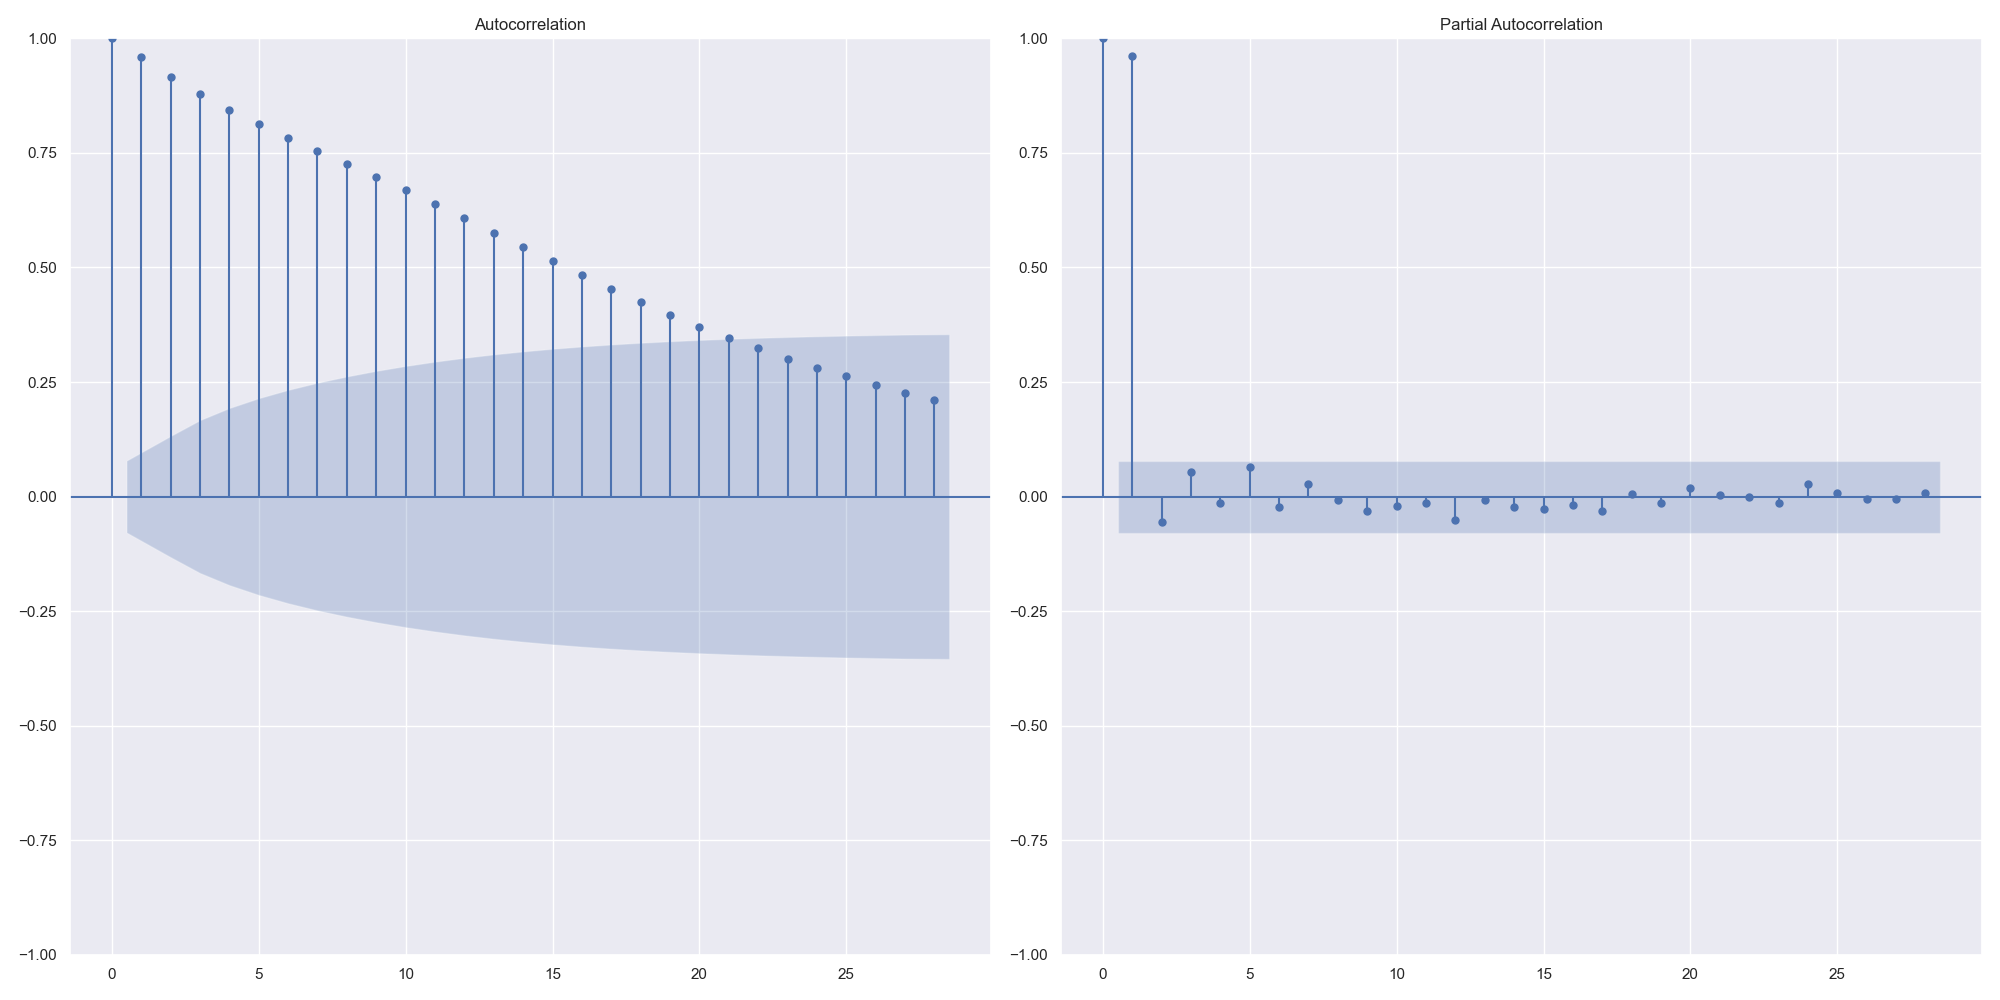
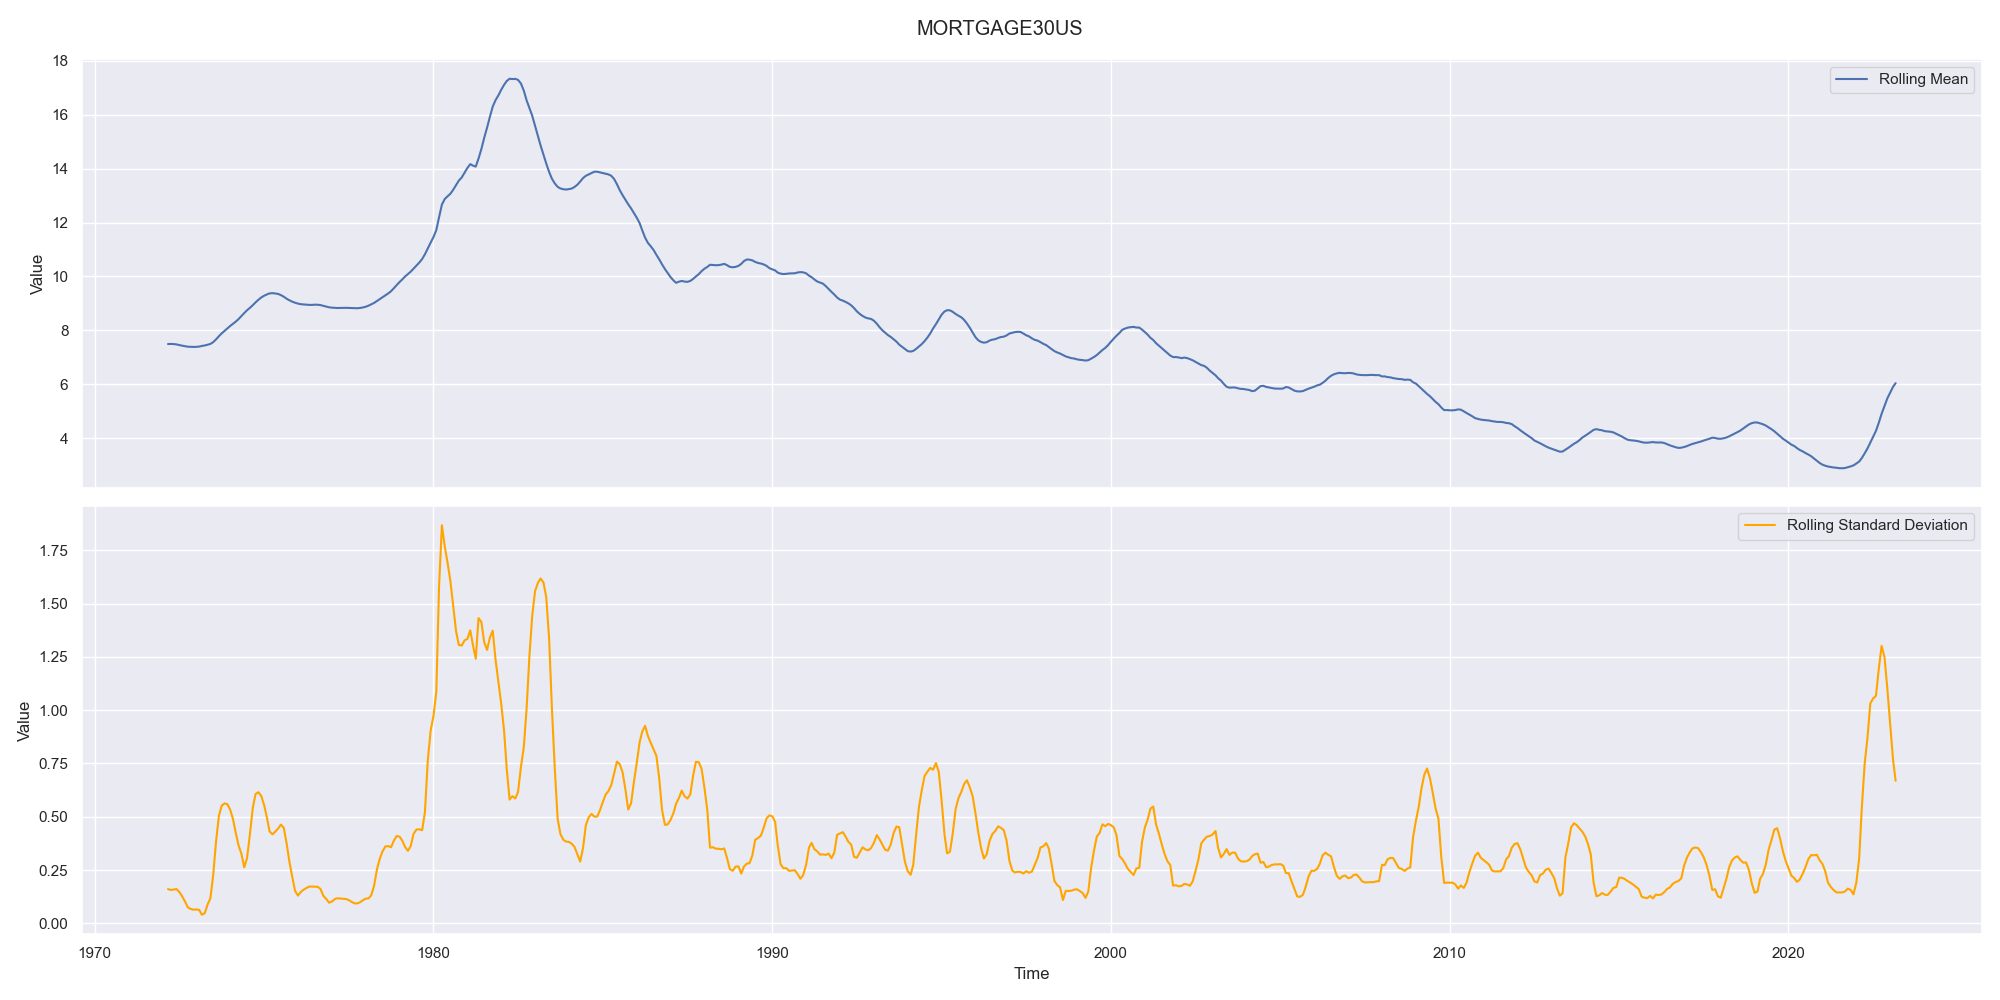
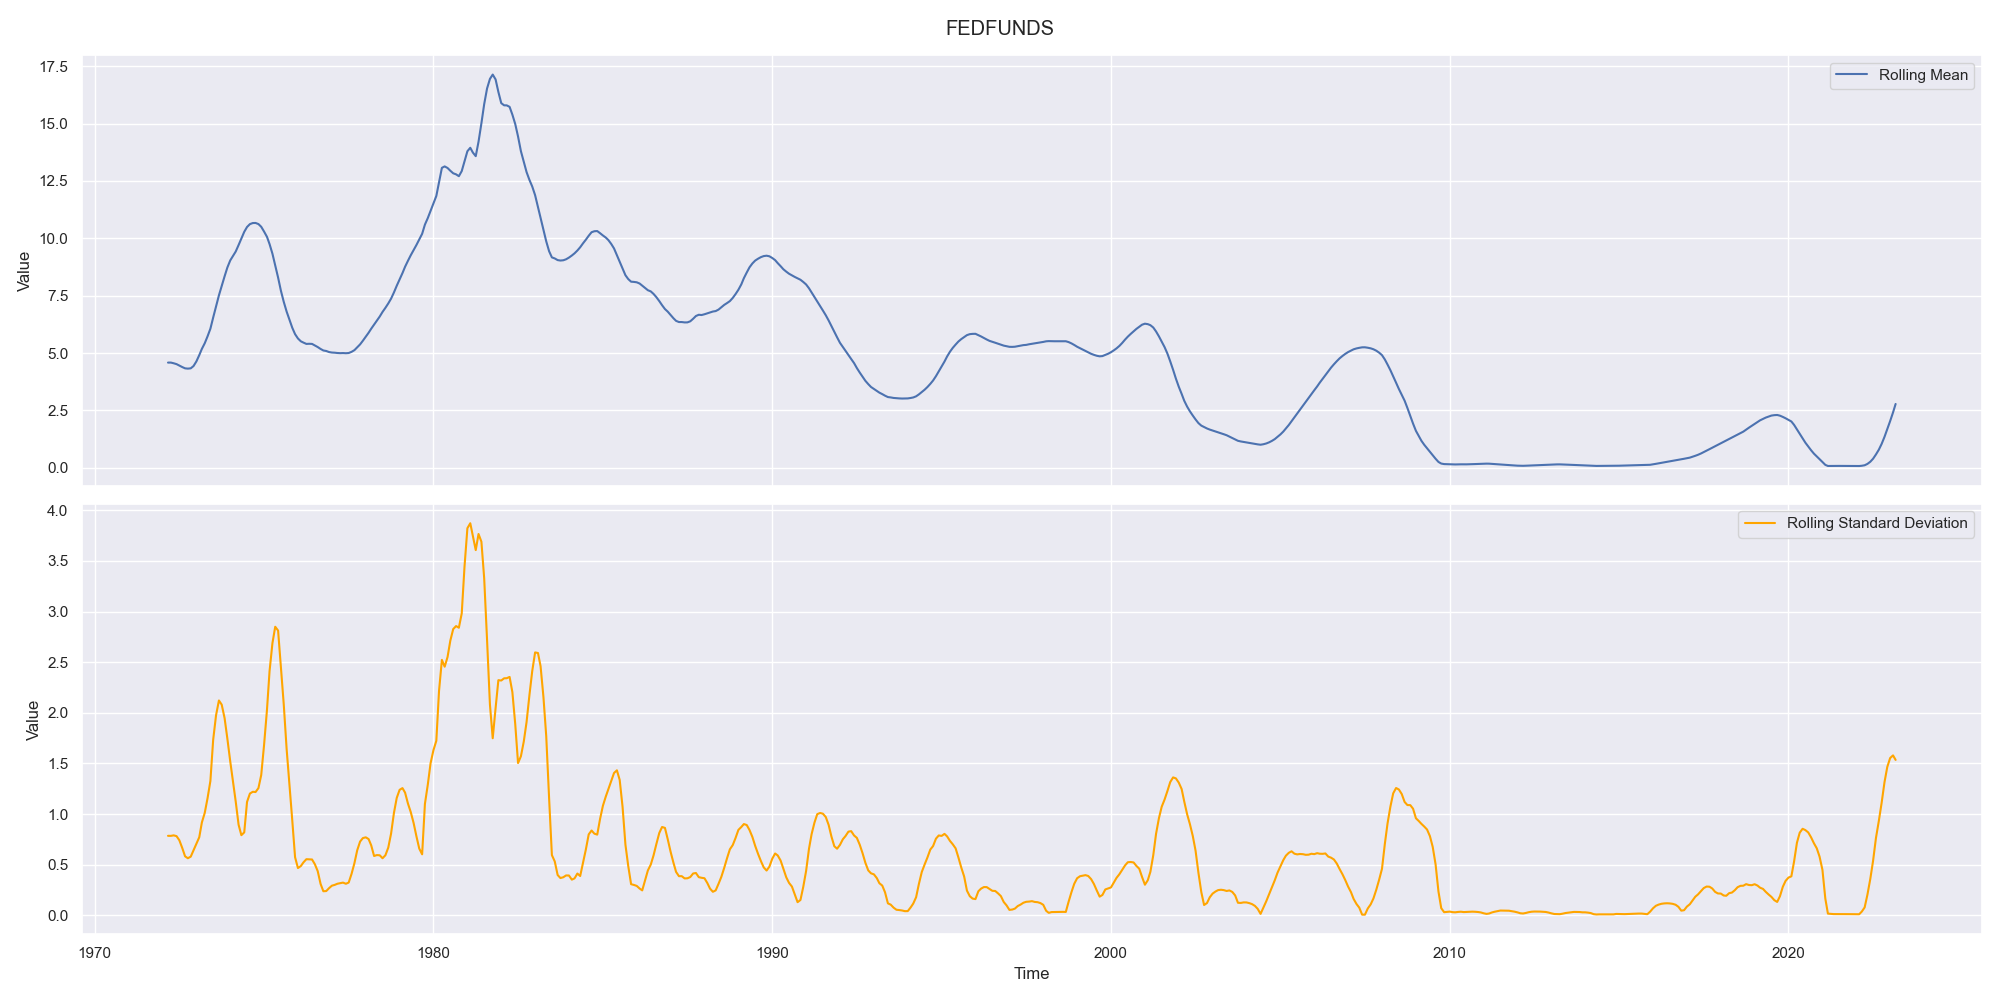
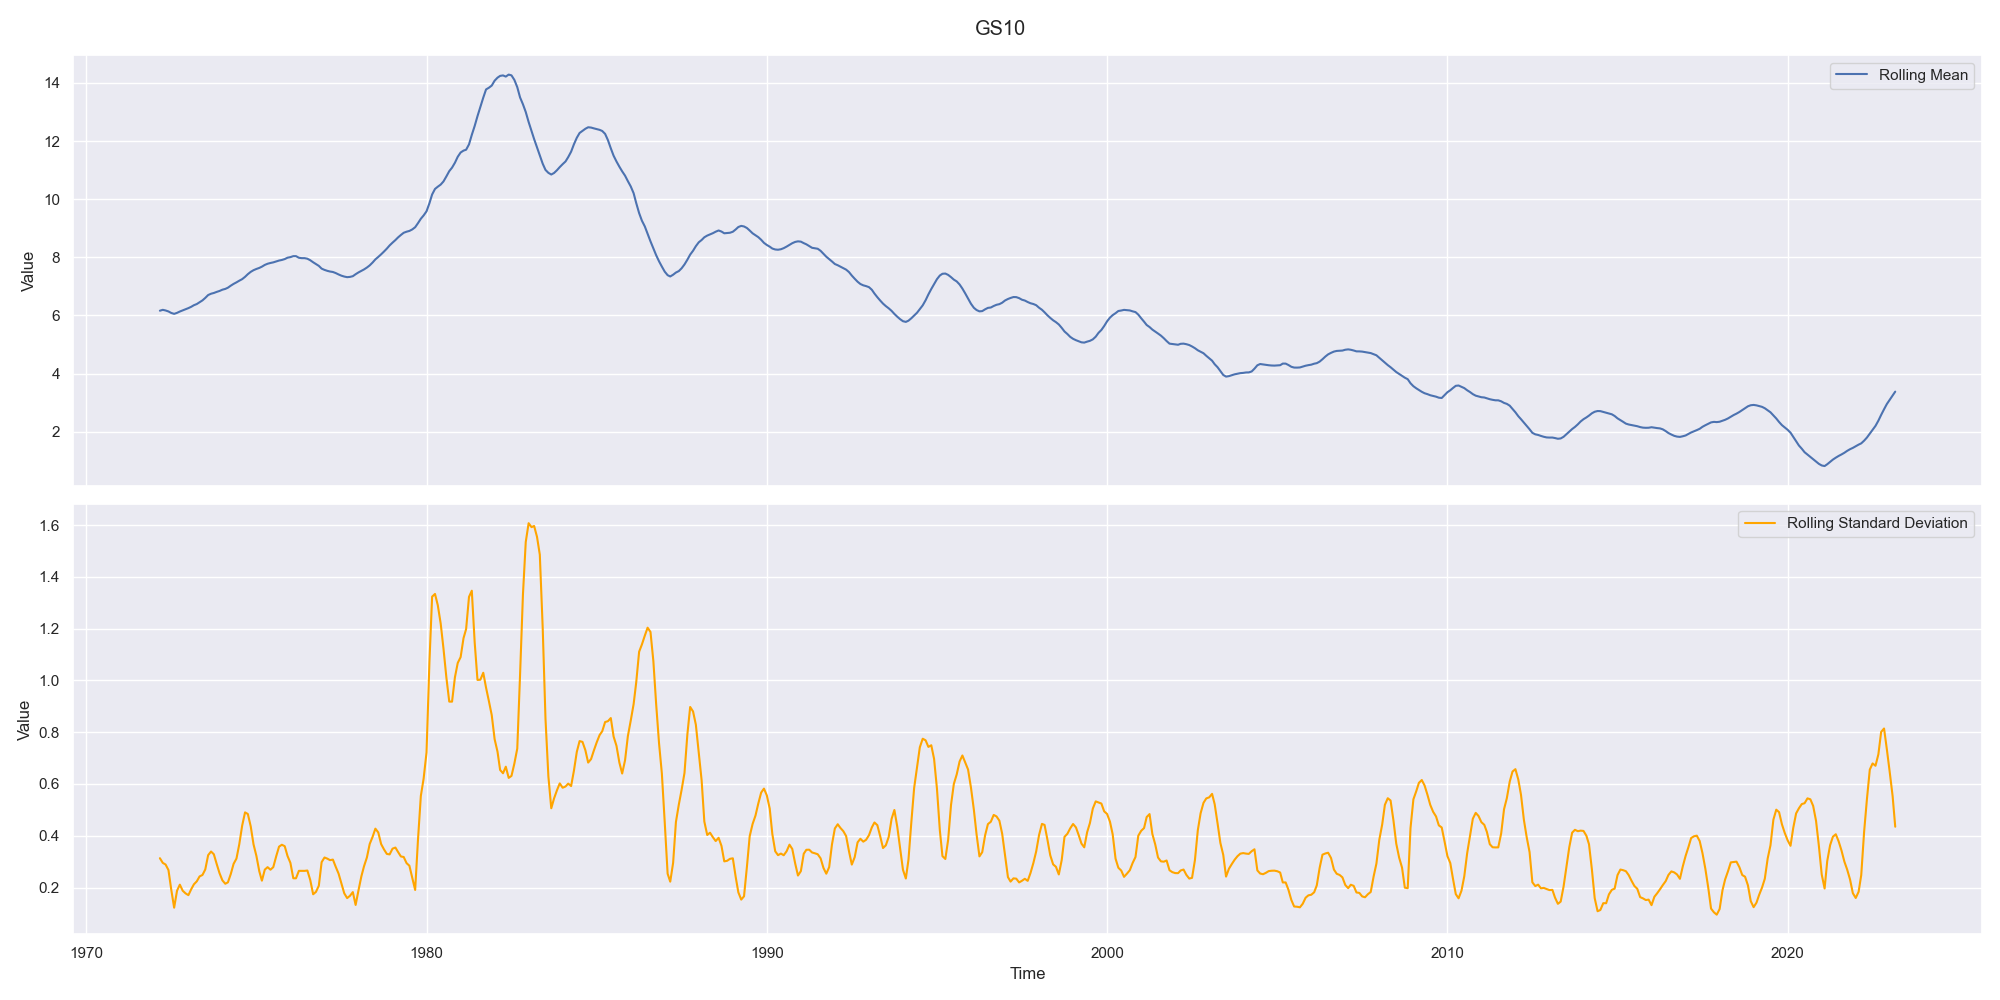
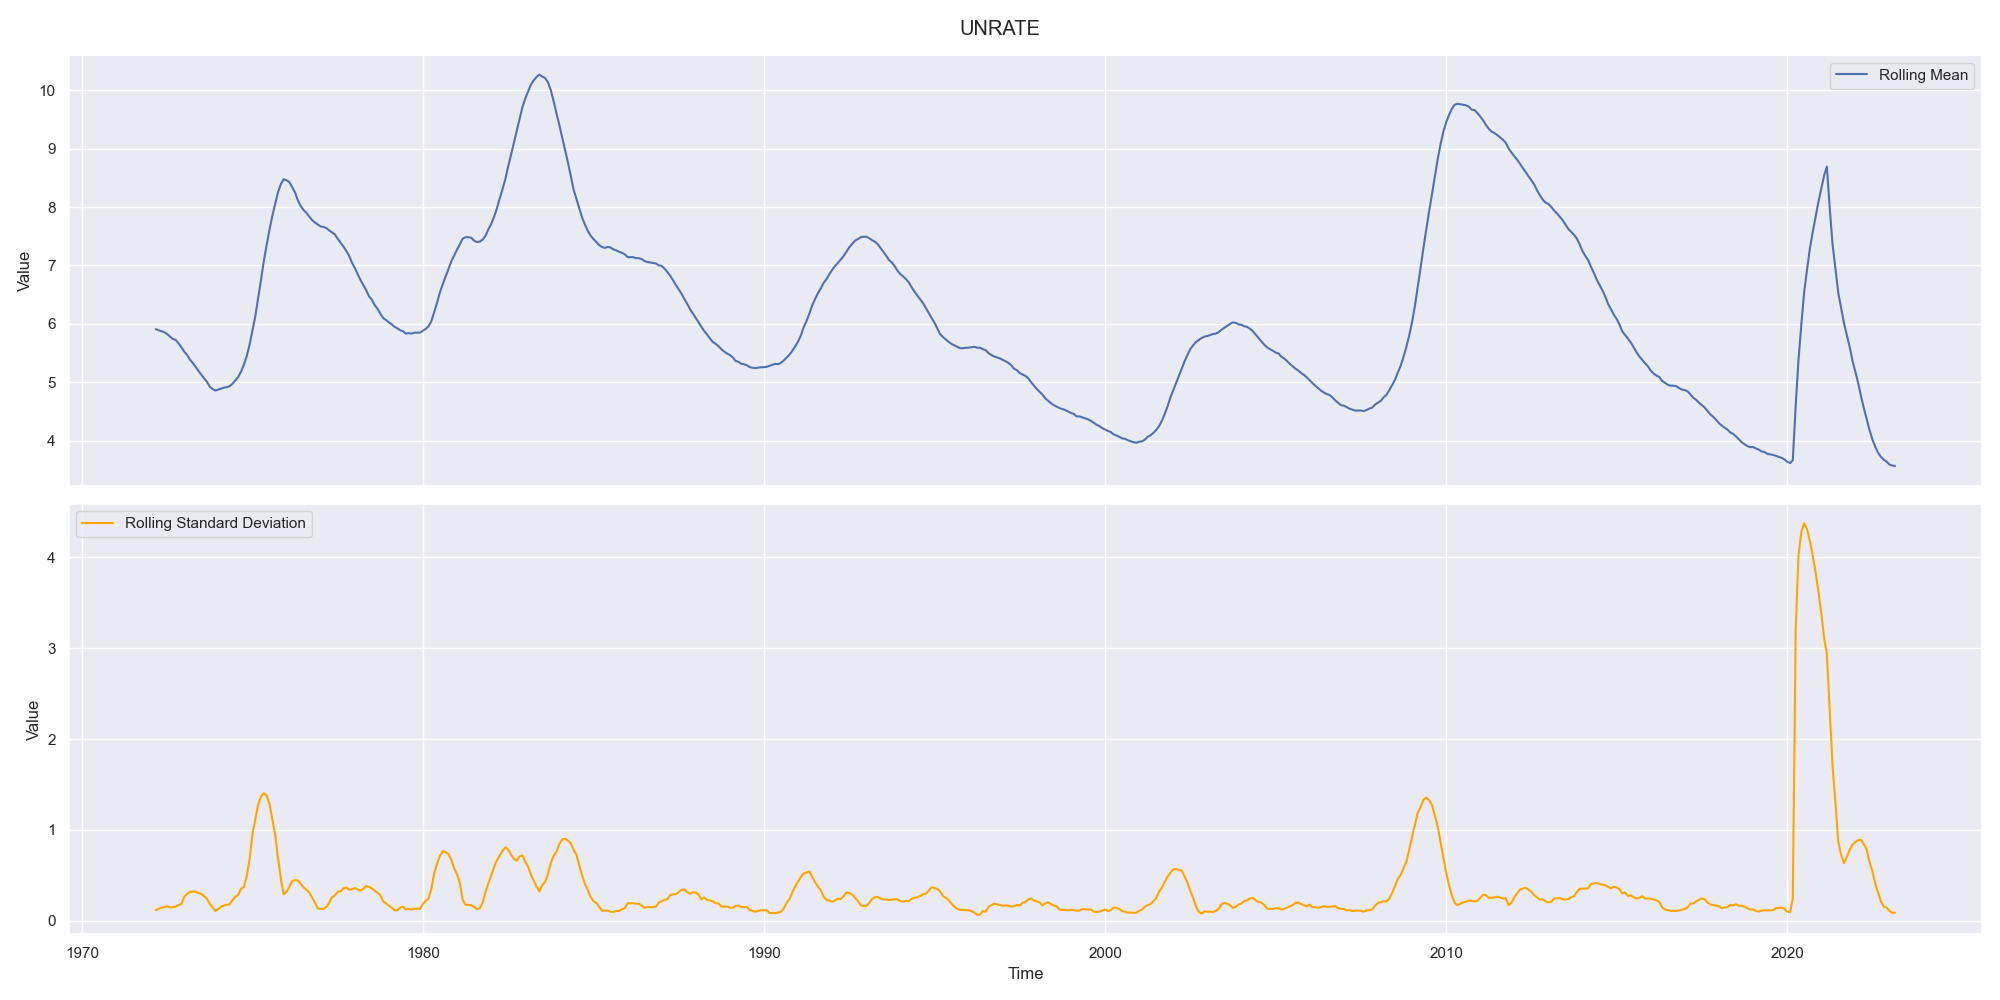

TimeSeriesUnivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1971-04-01          7.29      4.16  5.83     5.9
1971-05-01          7.46      4.63  6.39     5.9
1971-06-01          7.54      4.91  6.52     5.9
1971-07-01          7.69      5.31  6.73     6.0
1971-08-01          7.69      5.57  6.58     6.1
...                  ...       ...   ...     ...
2022-11-01          6.58      3.78  3.89     3.6
2022-12-01          6.42      4.10  3.62     3.5
2023-01-01          6.13      4.33  3.53     3.4
2023-02-01          6.50      4.57  3.75     3.6
2023-03-01          6.32      4.65  3.66     3.5

[624 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.29, 'FEDFUNDS': 4.16, 'GS10': 5.83, 'UNRATE': 5.9}

In [60]:
test_plan_config = {
    "time_series_line_plot": {
        "columns": target_column + feature_columns
    },
    "time_series_histogram": {
        "columns": target_column + feature_columns
    },
    "acf_pacf_plot": {
        "columns": target_column + feature_columns
    },
    "auto_ar": {
        "max_ar_order": 3
    },
    "auto_ma": {
        "max_ma_order": 3
    },
    "seasonal_decompose": {
        "seasonal_model": 'additive',
         "fig_size": (40,30)
    },
    "auto_seasonality": {
        "min_period": 1,
        "max_period": 3
    },
      "auto_stationarity": {
        "max_order": 3,
        "threshold": 0.05
    },
      "rolling_stats_plot": {
        "window_size": 12    
    },
}

vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column=target_column
)
vm.run_test_plan("time_series_univariate", config=test_plan_config, dataset=vm_dataset)

### Multivariate Analysis

#### Run Time Series Multivariate Test Plan

In [61]:
vm.test_plans.describe_plan("time_series_multivariate")

Attribute,Value
ID,time_series_multivariate
Name,TimeSeriesMultivariate
Description,Test plan to perform time series multivariate analysis.
Required Context,['dataset']
Tests,"ScatterPlot (Metric), LaggedCorrelationHeatmap (Metric), SpreadPlot (Metric)"
Test Plans,[]



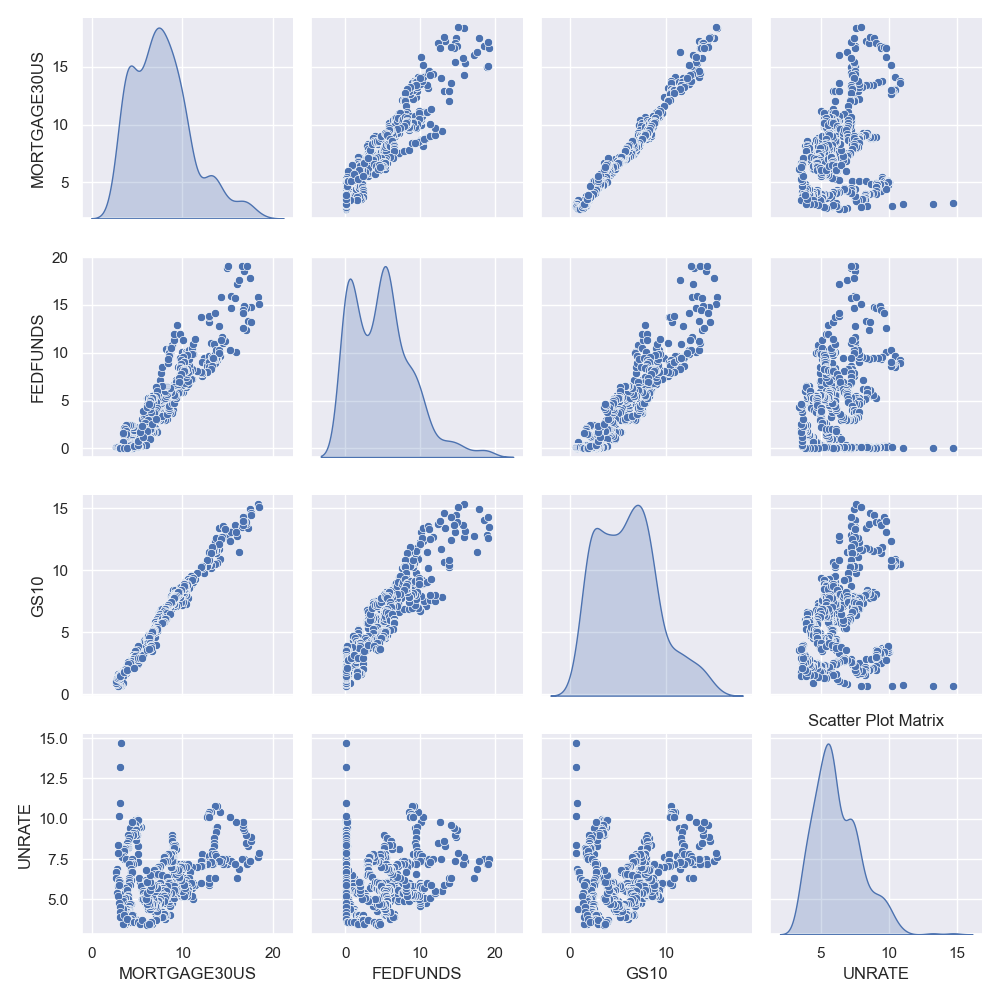
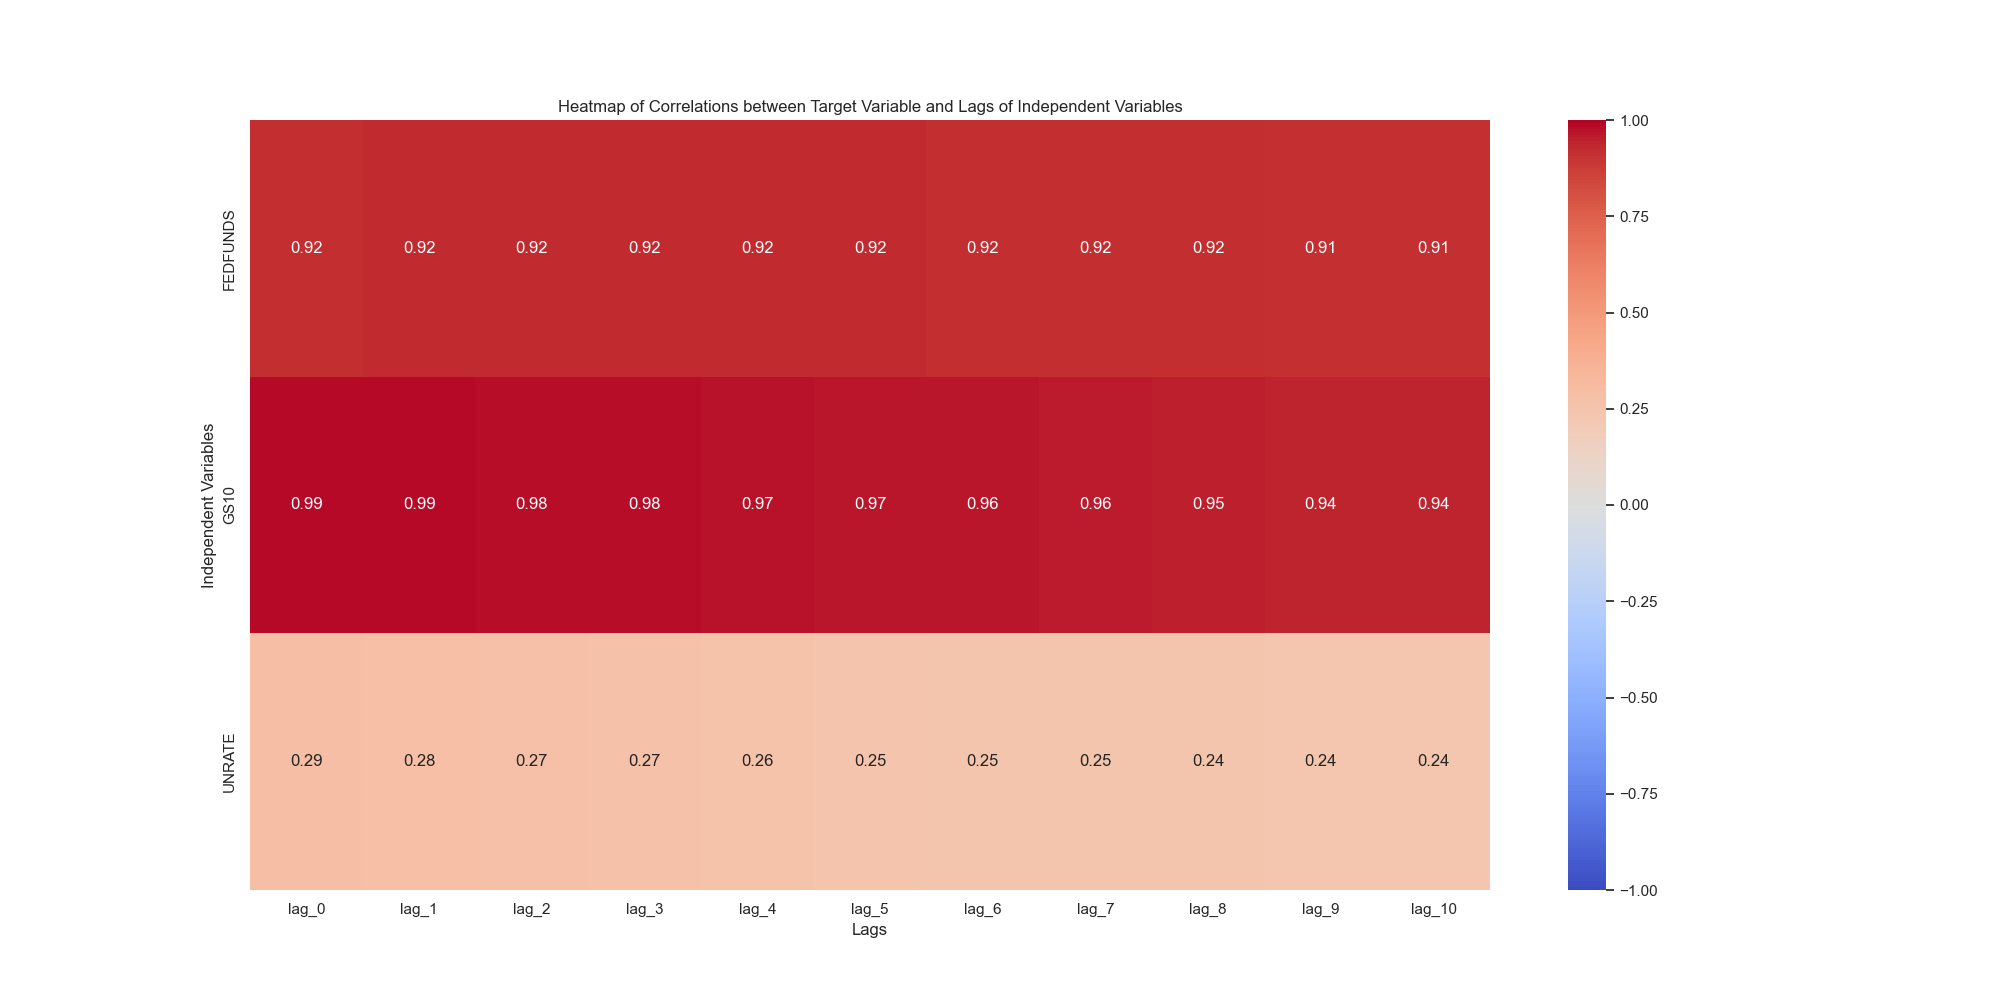
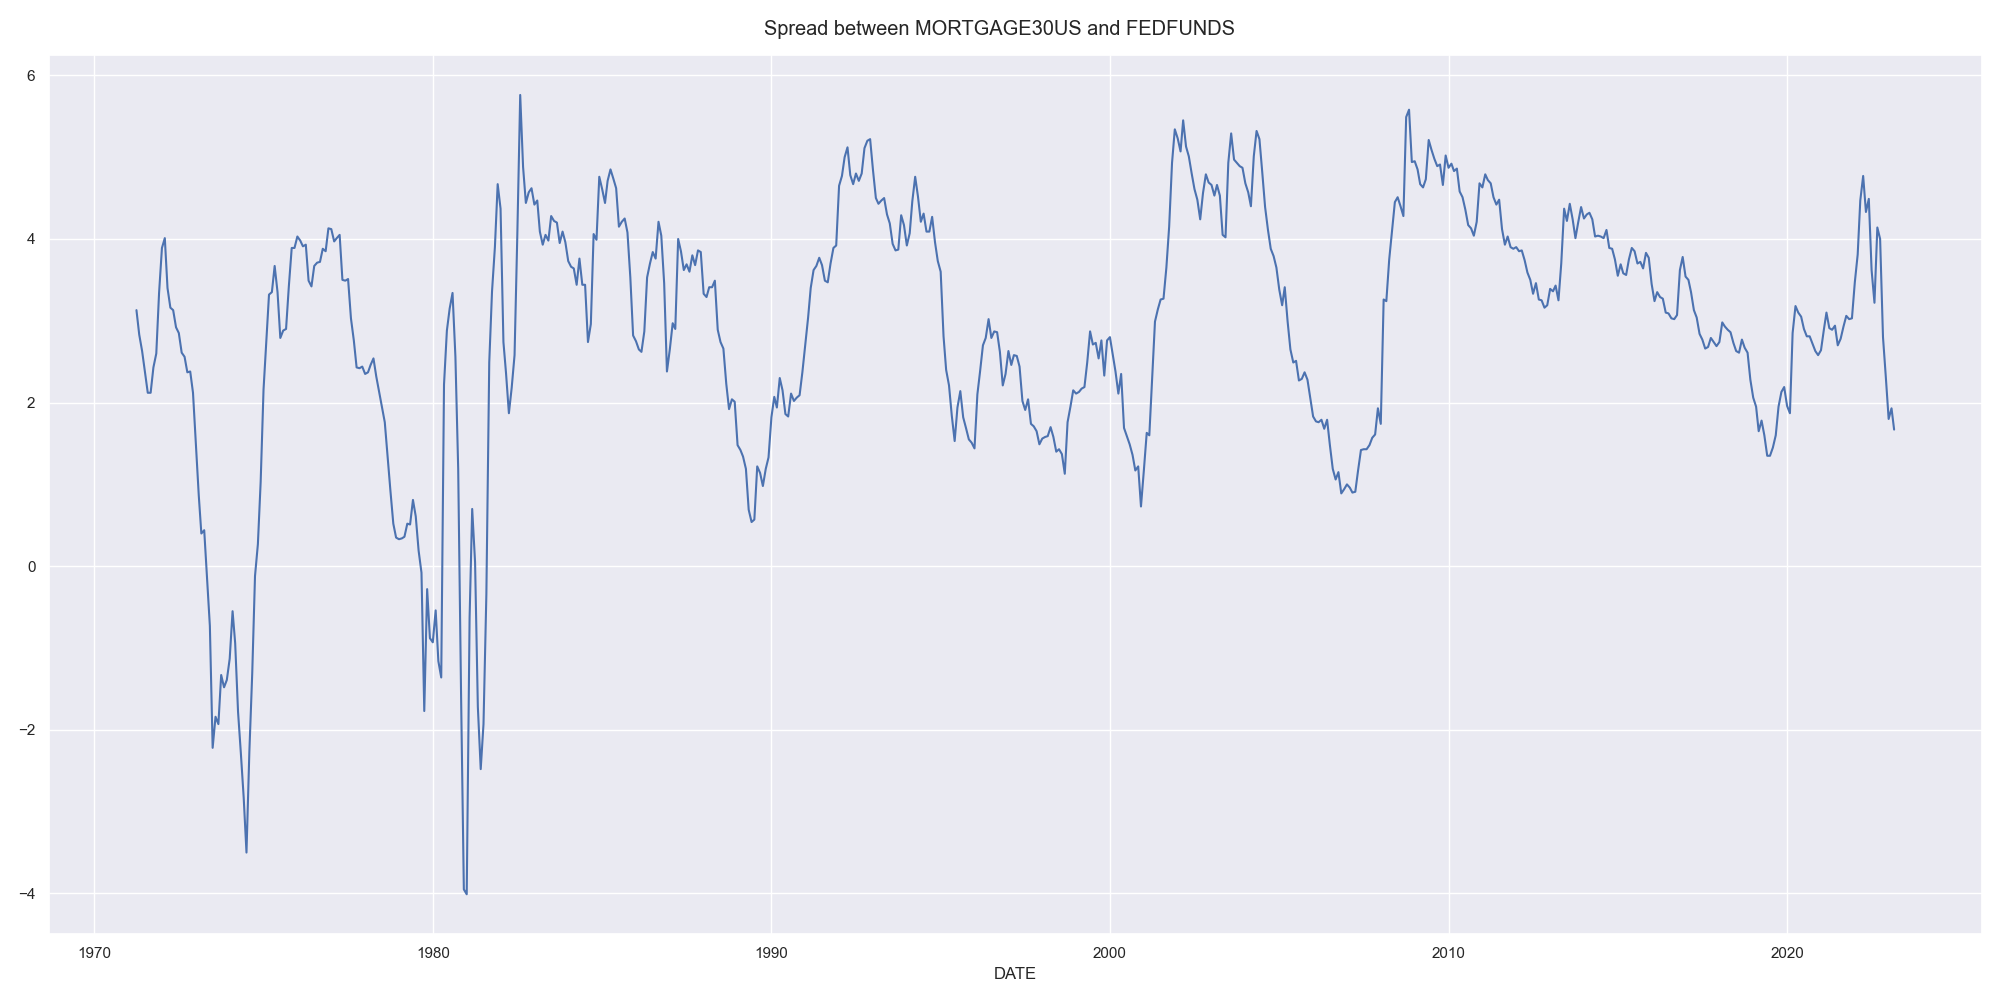
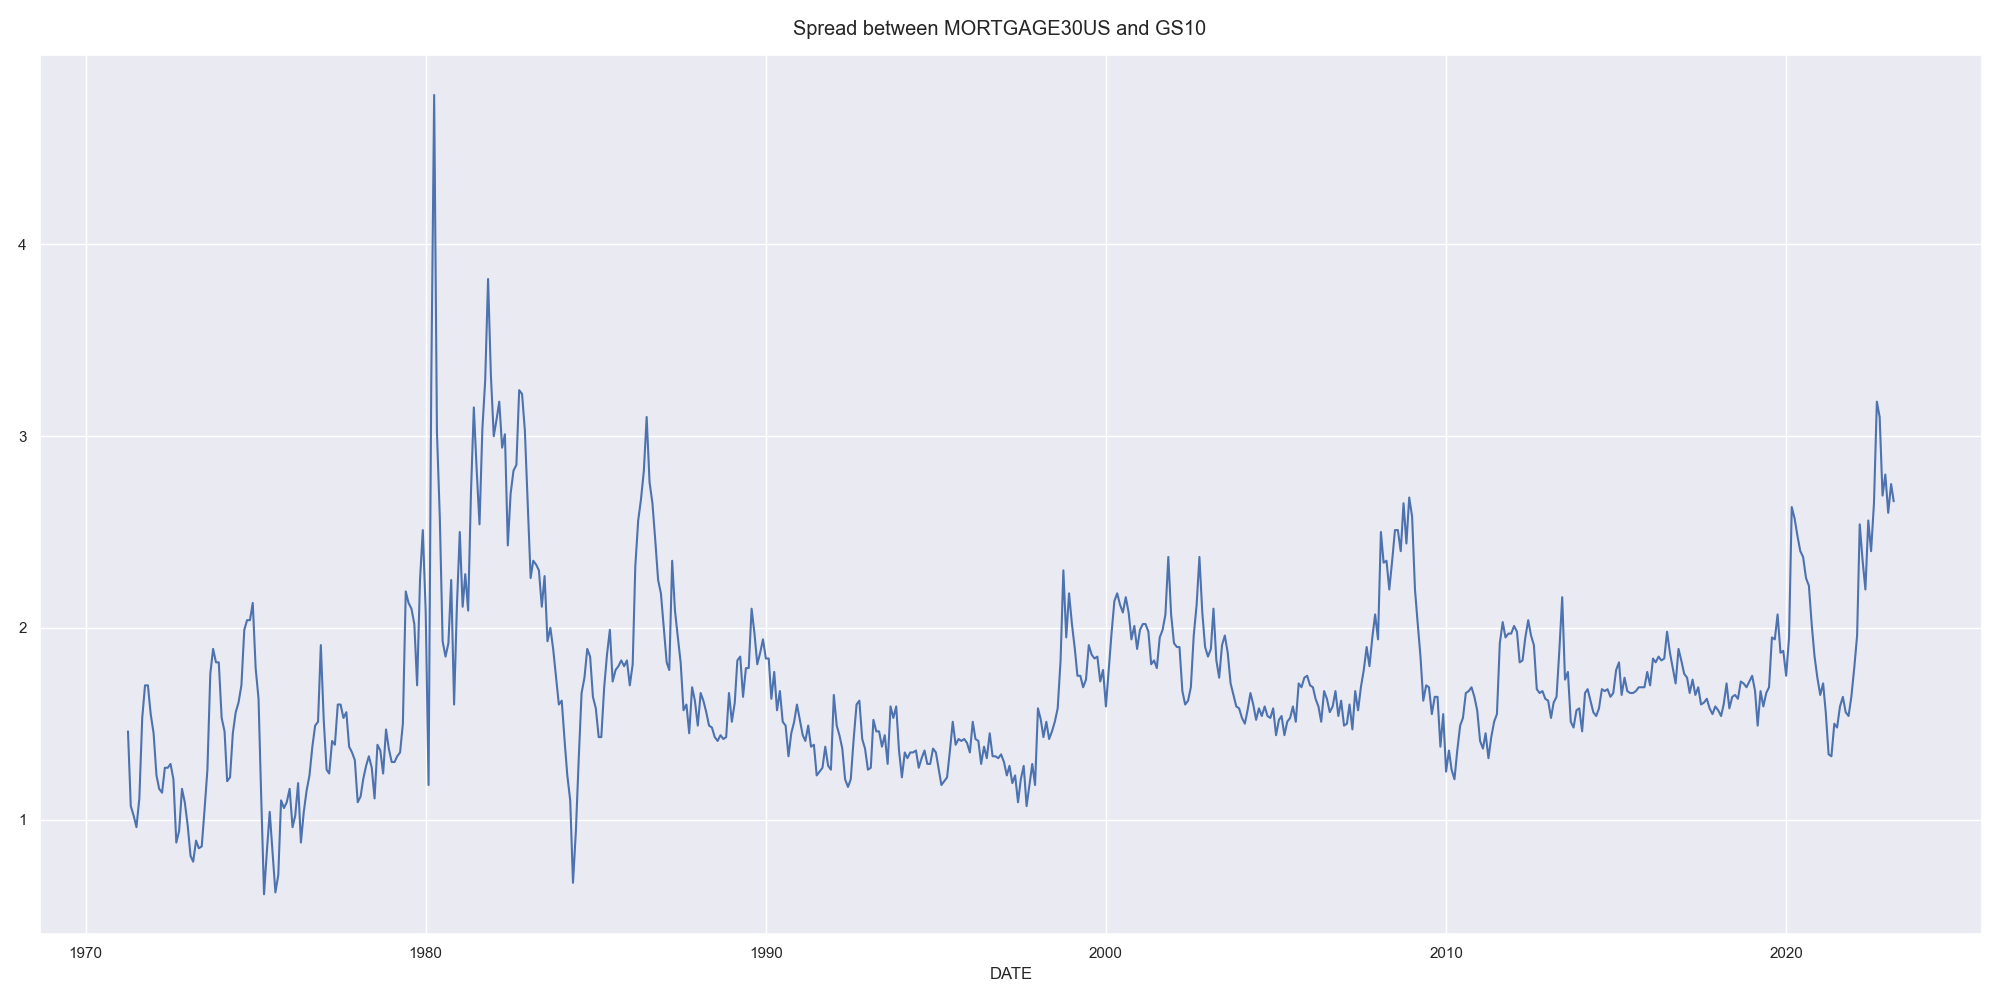
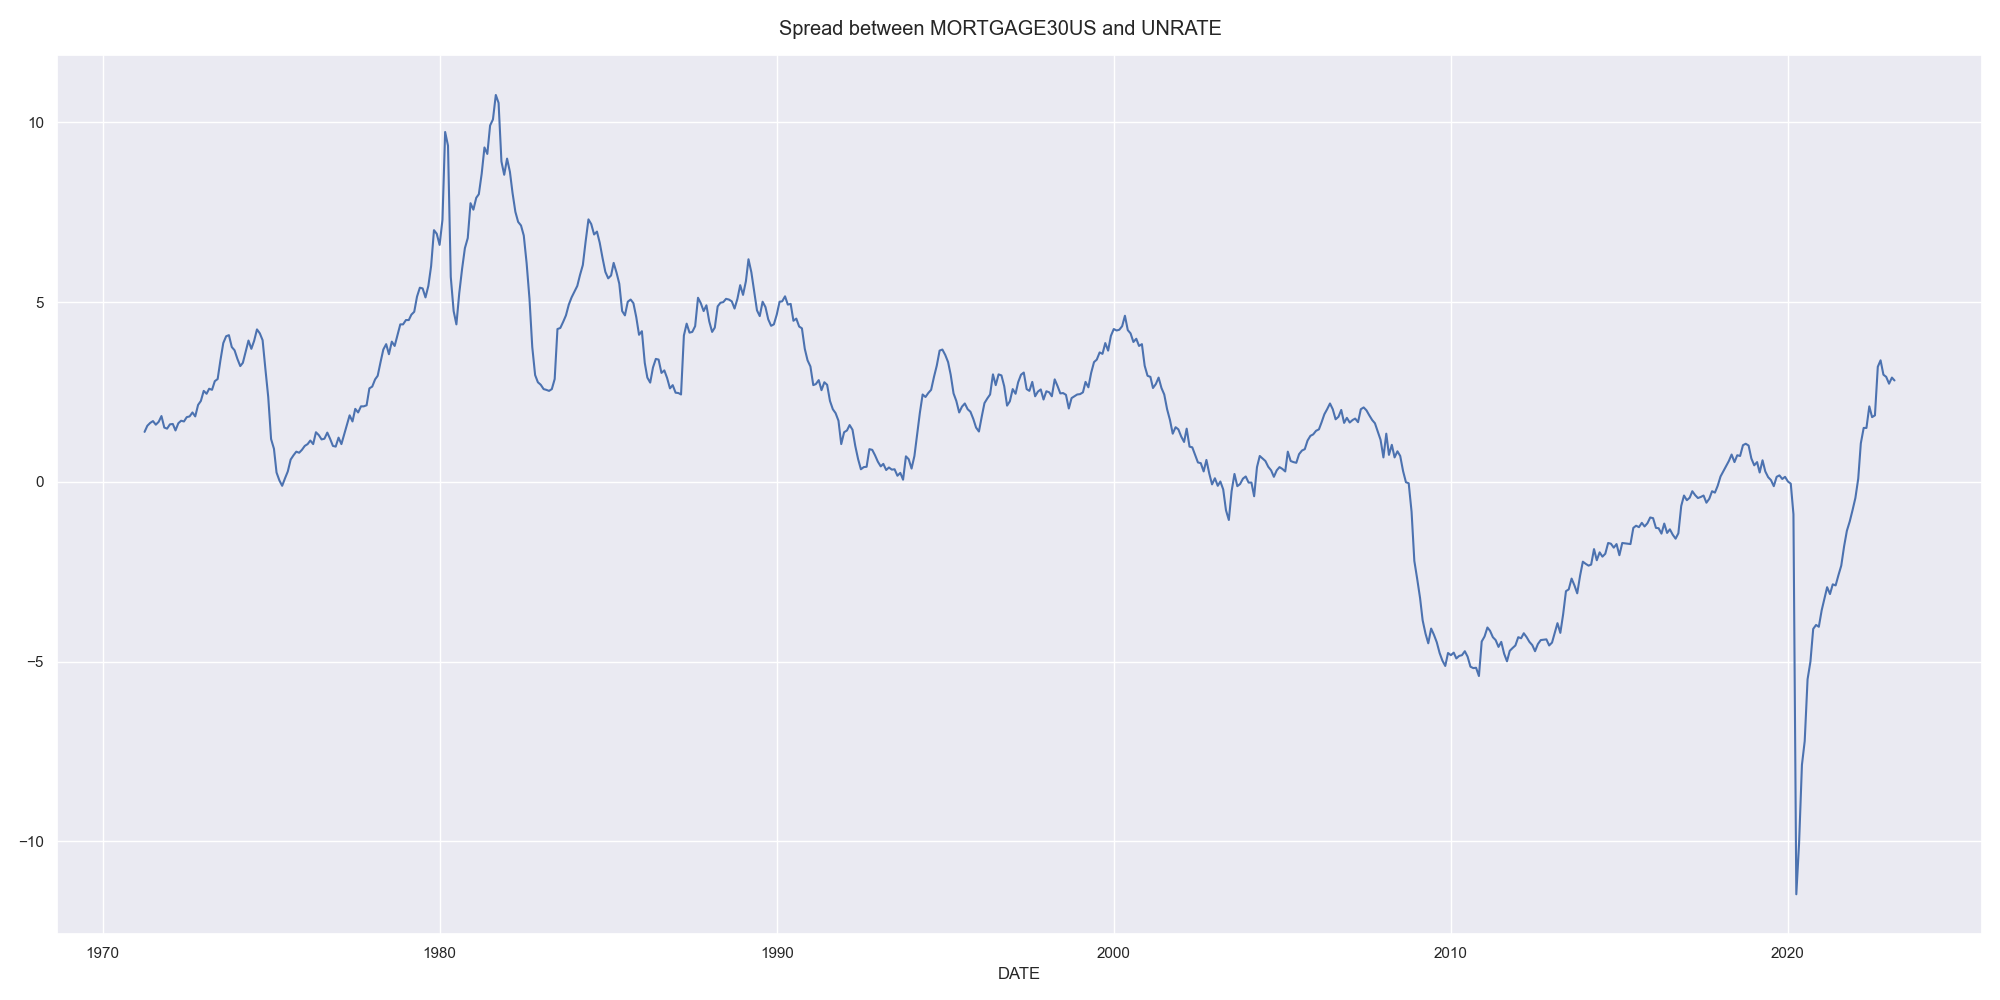
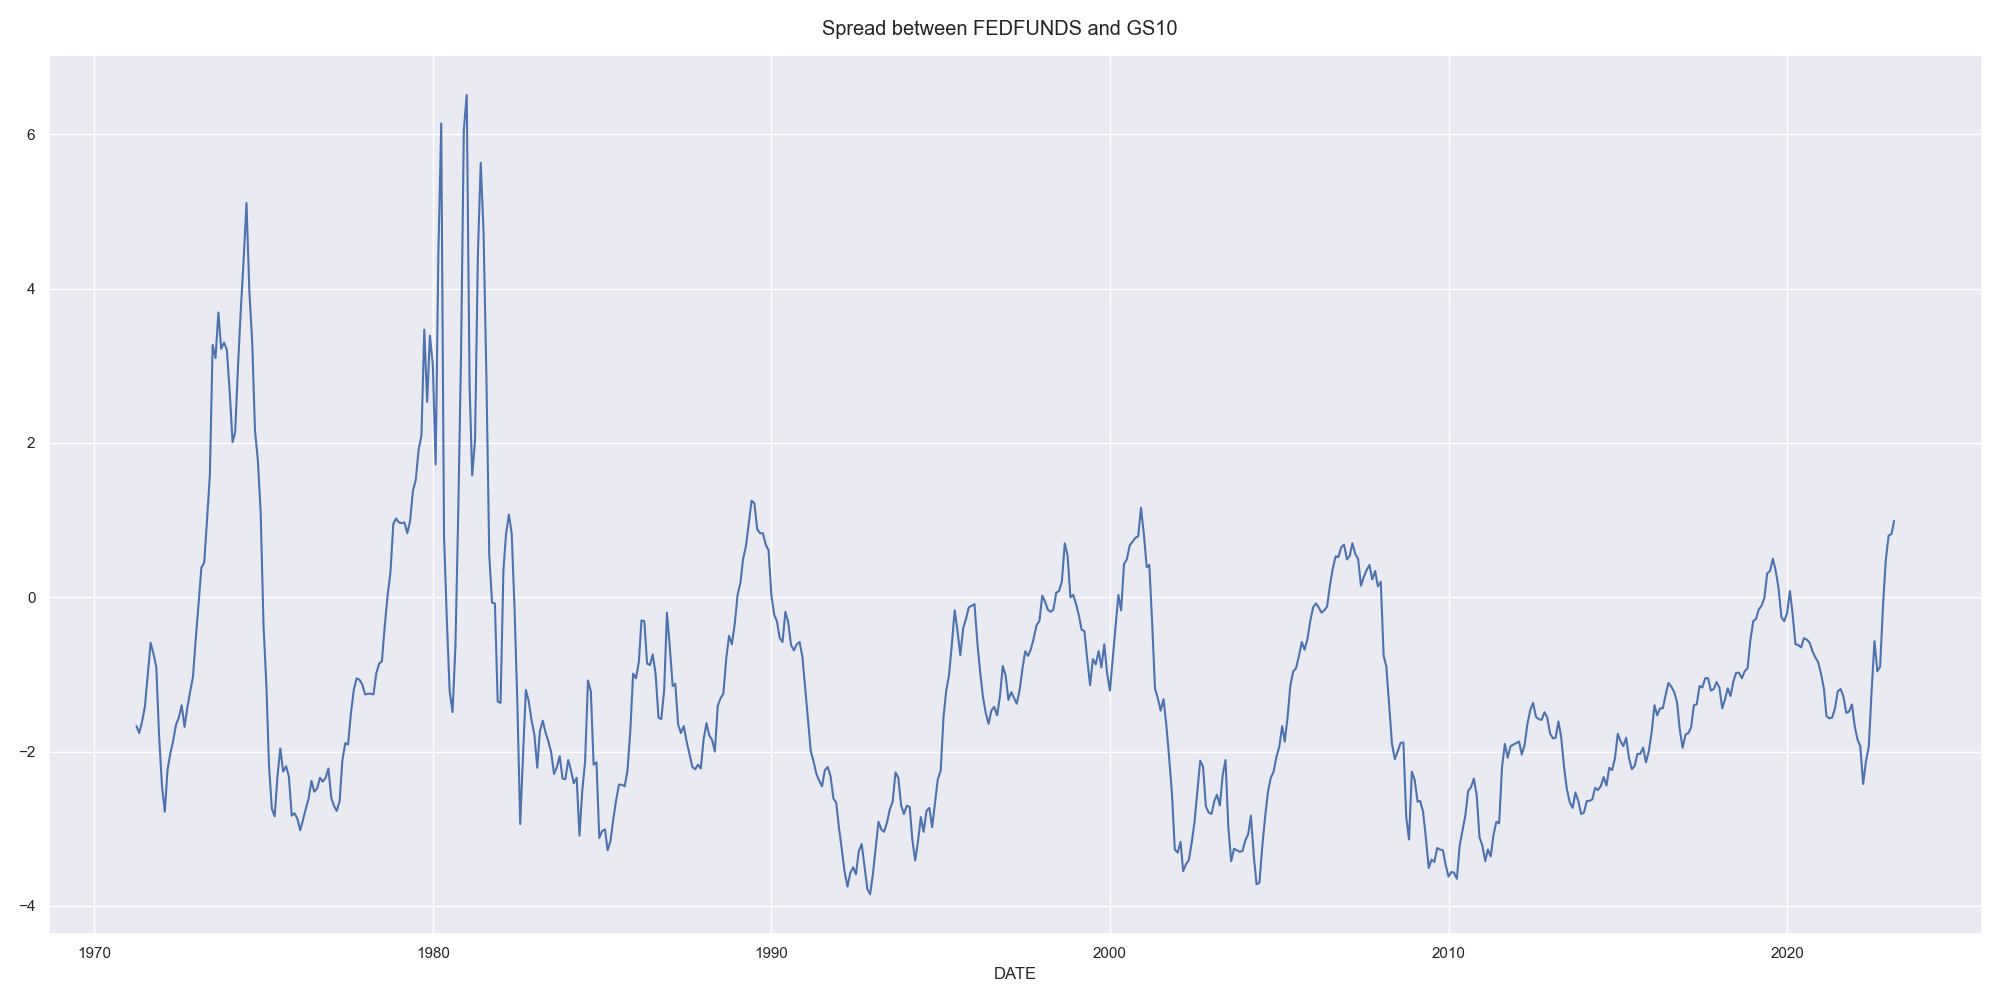
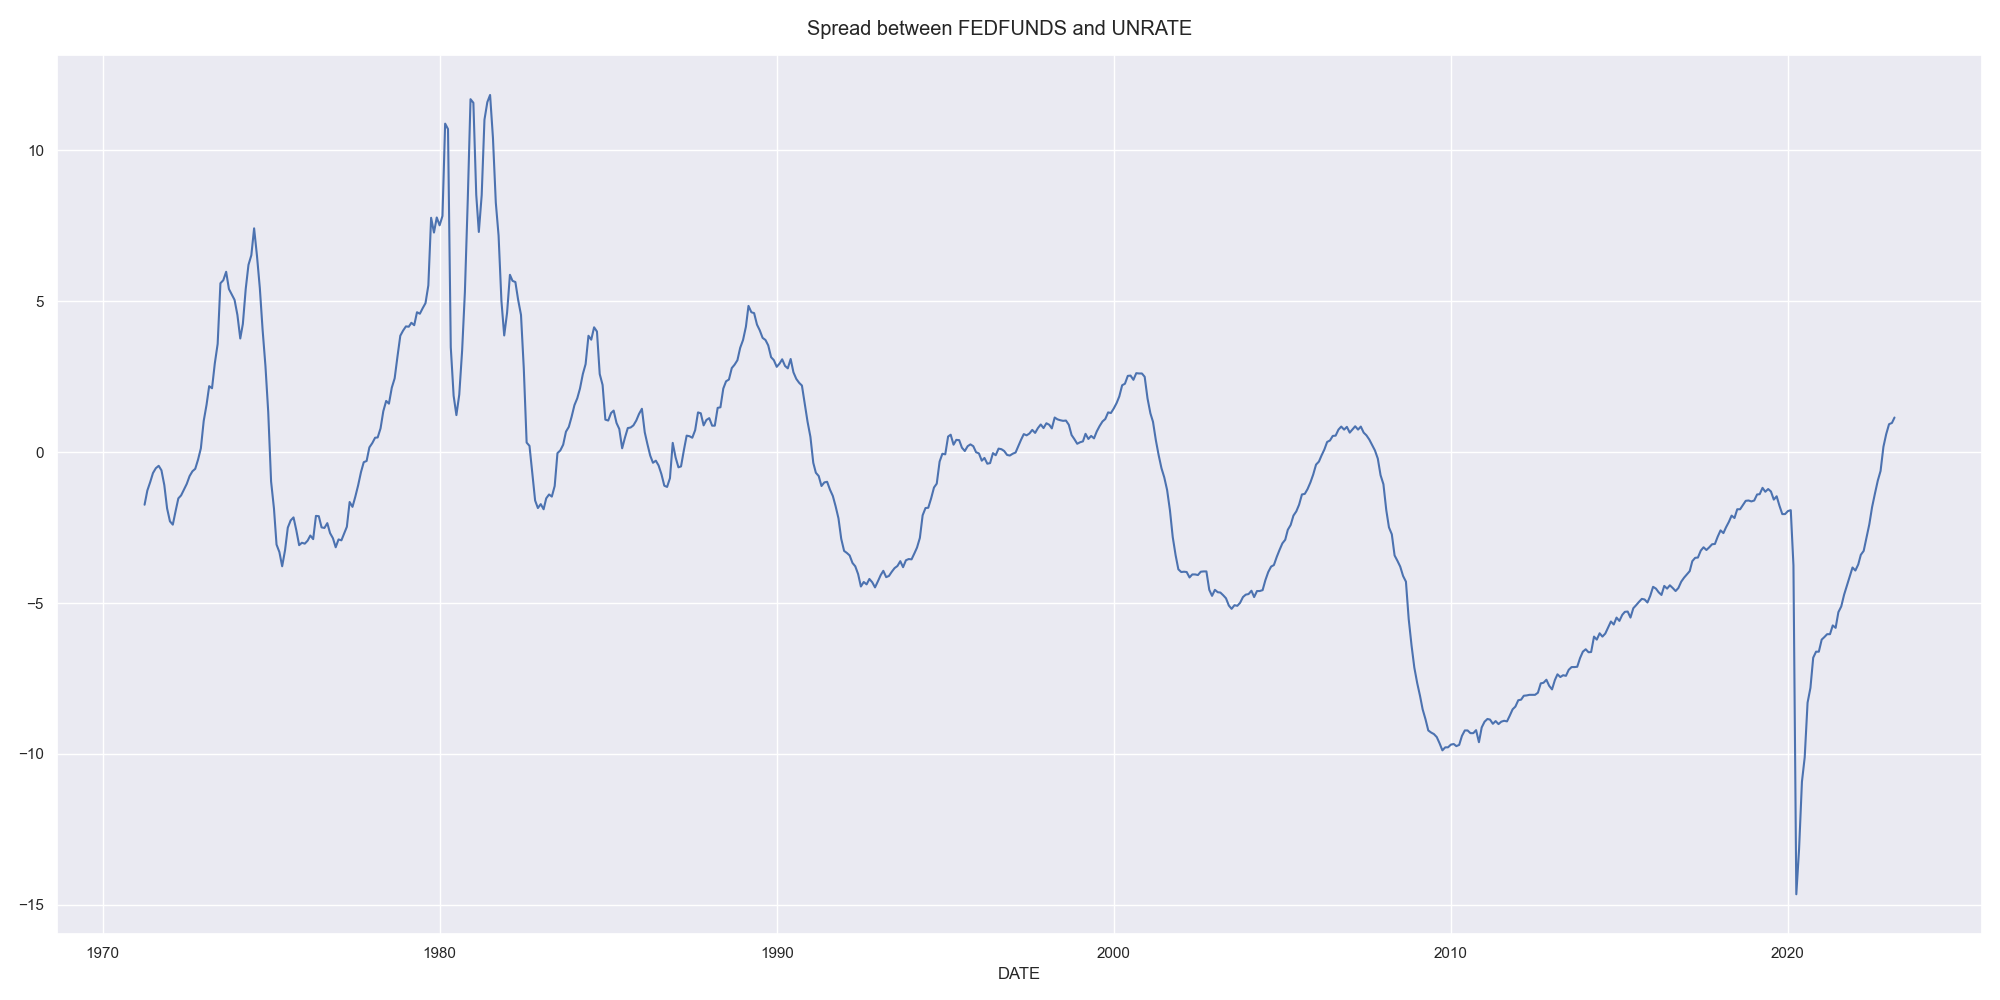
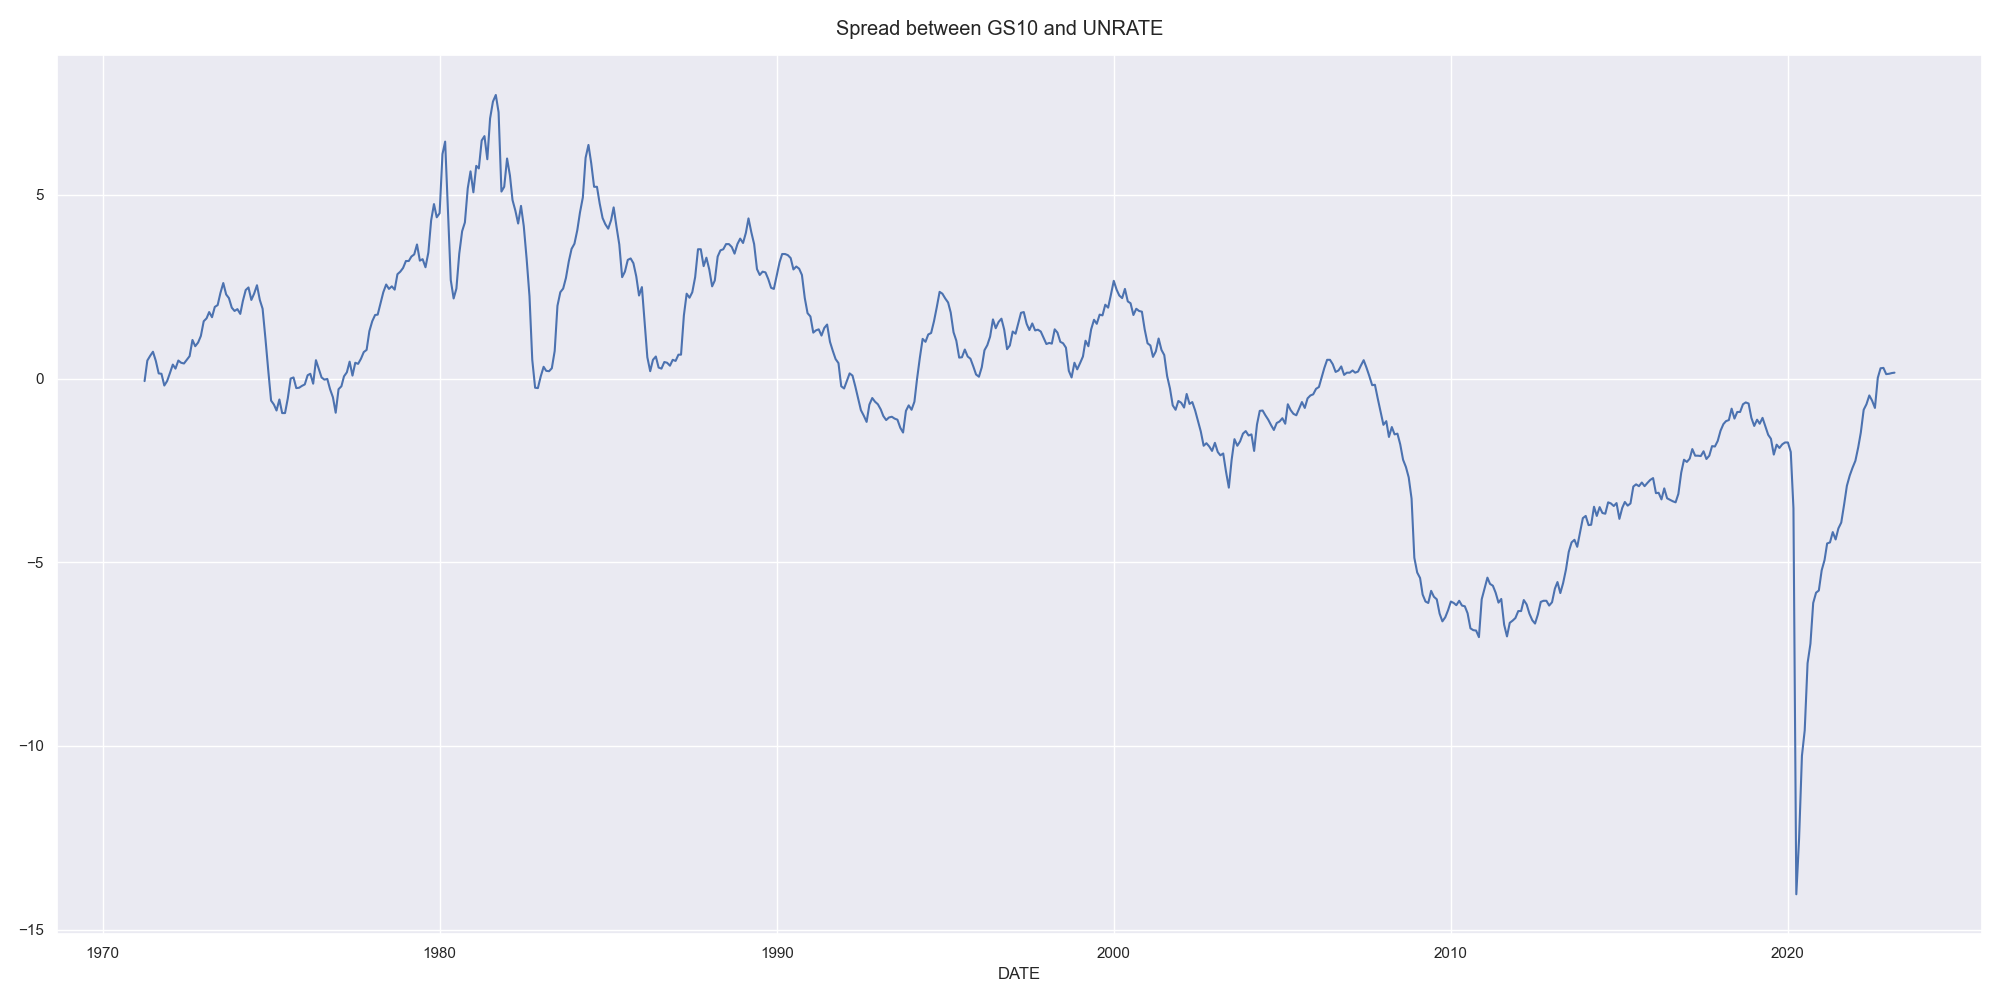

TimeSeriesMultivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  FEDFUNDS  GS10  UNRATE
DATE                                            
1971-04-01          7.29      4.16  5.83     5.9
1971-05-01          7.46      4.63  6.39     5.9
1971-06-01          7.54      4.91  6.52     5.9
1971-07-01          7.69      5.31  6.73     6.0
1971-08-01          7.69      5.57  6.58     6.1
...                  ...       ...   ...     ...
2022-11-01          6.58      3.78  3.89     3.6
2022-12-01          6.42      4.10  3.62     3.5
2023-01-01          6.13      4.33  3.53     3.4
2023-02-01          6.50      4.57  3.75     3.6
2023-03-01          6.32      4.65  3.66     3.5

[624 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.29, 'FEDFUNDS': 4.16, 'GS10': 5.83, 'UNRATE': 5.

In [62]:
test_plan_config = {
    "scatter_plot": {
        "columns": target_column + feature_columns
    },
    "lagged_correlation_heatmap": {
        "target_col": target_column,
        "independent_vars": feature_columns
    },
    "engle_granger_coint": {
        "threshold": 0.05
    },
}

vm.run_test_plan("time_series_multivariate", config=test_plan_config, dataset=vm_dataset)